In [1]:
# Some standard definitions and some new:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from astropy.time import Time
import pylab
import glob
import time
import scipy.signal
import matplotlib.cm as cm
from astropy.stats import sigma_clip
import scipy.ndimage.interpolation as interp
from scipy.ndimage.interpolation import shift
import astropy
from astropy.stats import LombScargle
from photutils import DAOStarFinder
import os
import pandas as pd
from collections import Counter
from numpy import genfromtxt
%matplotlib inline

In [2]:
old = 0
if old ==1:
    targ_names = {'Upper_Left_Quad rel_flux_T1':"V819 Tau",
                 'Upper_Left_Quad rel_flux_T2':"FR Tau",
                 'Upper_Left_Quad rel_flux_T3':"FQ Tau",
                 'Upper_Right_Quad rel_flux_T1':"V410 X-ray 3",
                 'Upper_Right_Quad rel_flux_T2':"V410 X-ray 1",
                 'Lower_Left_Quad rel_flux_T1':"V410 X-ray 6",
                 'Lower_Right_Quad rel_flux_T1':"CoKu Tau",
                 'Lower_Right_Quad rel_flux_T2':"V892 Tau",
                 'Lower_Right_Quad rel_flux_T3':"CZ Tau",
                 'Lower_Right_Quad rel_flux_T4':"DD Tau",
                 'Lower_Right_Quad rel_flux_T5':"KPNO 10",
                 'HH_30 rel_flux_T1' :"HH 30",
                 'HL_Tau rel_flux_T1' : "HL Tau",
                 'LkHa_267 rel_flux_T1': "LkHa 267",
                 'LkHa_358 rel_flux_T1' : "LkHa 358",
                 'Other_UX_Tau rel_flux_T1': "UX Tau B",
                 'UX_Tau_A_or_B rel_flux_T1': "UX Tau A",
                 'XZ_Tau rel_flux_T1' : "XZ Tau"}
    targ_err_names = {'Upper_Left_Quad rel_flux_err_T1':"V819 Tau",
                 'Upper_Left_Quad rel_flux_err_T2':"FR Tau",
                 'Upper_Left_Quad rel_flux_err_T3':"FQ Tau",
                 'Upper_Right_Quad rel_flux_err_T1':"V410 X-ray 3",
                 'Upper_Right_Quad rel_flux_err_T2':"V410 X-ray 1",
                 'Lower_Left_Quad rel_flux_err_T1':"V410 X-ray 6",
                 'Lower_Right_Quad rel_flux_err_T1':"CoKu Tau",
                 'Lower_Right_Quad rel_flux_err_T2':"V892 Tau",
                 'Lower_Right_Quad rel_flux_err_T3':"CZ Tau",
                 'Lower_Right_Quad rel_flux_err_T4':"DD Tau",
                 'Lower_Right_Quad rel_flux_err_T5':"KPNO 10",
                 'HH_30 rel_flux_err_T1' :"HH 30",
                 'HL_Tau rel_flux_err_T1' : "HL Tau",
                 'LkHa_267 rel_flux_err_T1': "LkHa 267",
                 'LkHa_358 rel_flux_err_T1' : "LkHa 358",
                 'Other_UX_Tau rel_flux_err_T1': "UX Tau B",
                 'UX_Tau_A_or_B rel_flux_err_T1': "UX Tau A",
                 'XZ_Tau rel_flux_err_T1' : "XZ Tau"}
elif old==0:
    targ_names = {'tar_0_calmag': 'KPNO 10',
     'tar_1_calmag': 'V410 X-ray 1',
     'tar_2_calmag': 'V410 X-ray 3',
     'tar_3_calmag': 'DD Tau A+B',
     'tar_4_calmag': 'CZ Tau A+B',
     'tar_5_calmag': 'V892 Tau',
     'tar_6_calmag': 'CoKu Tau 1',
     'tar_7_calmag': 'V410 X-ray 6',
     'tar_8_calmag': 'FQ Tau A+B',
     'tar_9_calmag': 'V819 Tau',
     'tar_10_calmag': 'FR Tau'}
    targ_err_names = {'tar_0_cal_magerr_': 'KPNO 10',
     'tar_1_cal_magerr_': 'V410 X-ray 1',
     'tar_2_cal_magerr_': 'V410 X-ray 3',
     'tar_3_cal_magerr_': 'DD Tau A+B',
     'tar_4_cal_magerr_': 'CZ Tau A+B',
     'tar_5_cal_magerr_': 'V892 Tau',
     'tar_6_cal_magerr_': 'CoKu Tau 1',
     'tar_7_cal_magerr_': 'V410 X-ray 6',
     'tar_8_cal_magerr_': 'FQ Tau A+B',
     'tar_9_cal_magerr_': 'V819 Tau',
     'tar_10_cal_magerr_': 'FR Tau'}
targ_mass = {'KPNO 10':[0.117],
            'DD Tau':[0.245],
            'CZ Tau':[0.177],
            'V892 Tau':['NaN'],
            'V410 X-ray 6':[0.088],
            'CoKu Tau':[0.558],
            'V410 X-ray 3':[0.058],
            'V819 Tau':[0.637],
            'FR Tau':[0.101],
            'V410 X-ray 1':[0.222],
            'FQ Tau':[0.245],
            'XZ Tau':[0.359],
            'HL Tau':[0.649],
            'LkHa 267':[0.398],
            'UX Tau A':[0.82],
            'UX Tau B':[0.359],
            'LkHa 358':[0.637],
            'HH 30':[0.558]}
names_of_targs = list(targ_names.values())

In [3]:
nyq = 500 #nyquist factor for Lomb-Scargle
min_freq = 0.25 #minimum frequency for Lomb-Scargle
max_freq = 20

window = 0.25
field = 'V410'
year = '2018'

direct = os.getcwd() #getting current directory

filters = ['V','I','R'] #all filters



/Users/astro_student/anaconda/envs/py3k/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


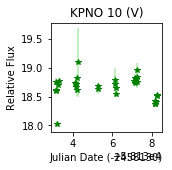

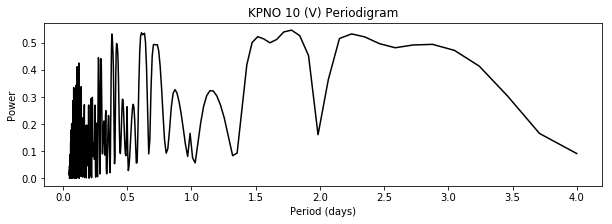

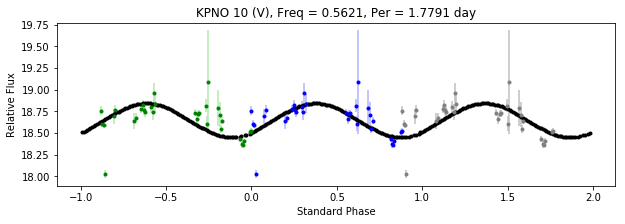

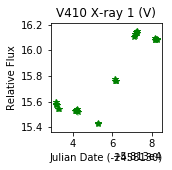

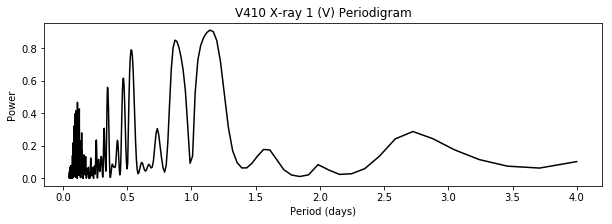

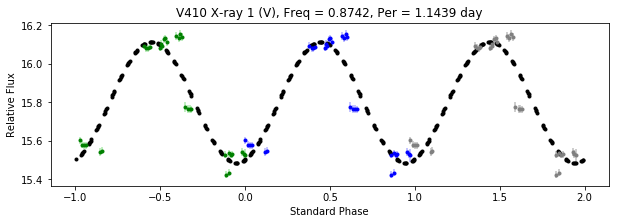

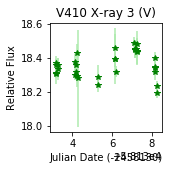

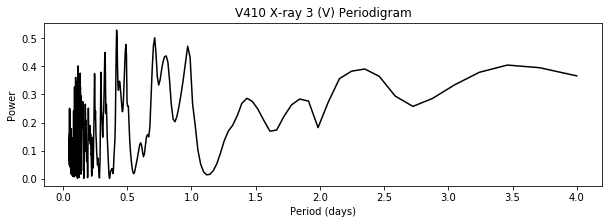

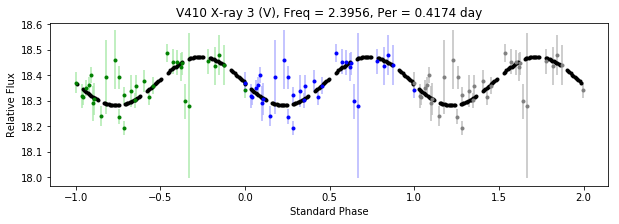

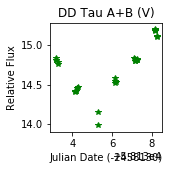

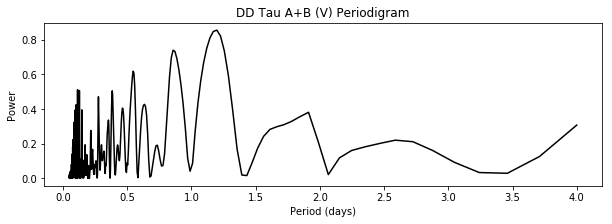

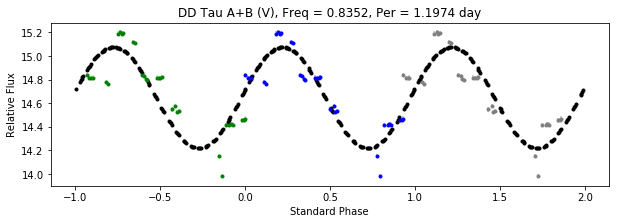

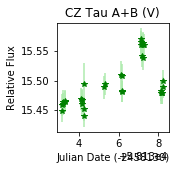

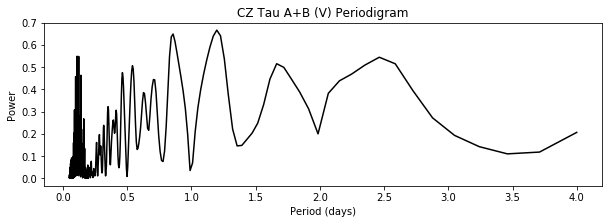

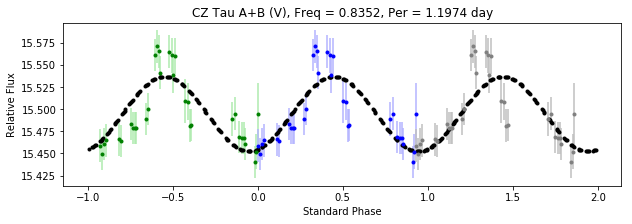

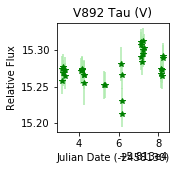

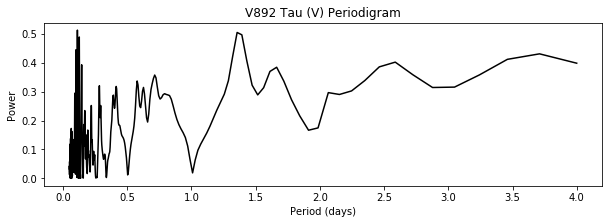

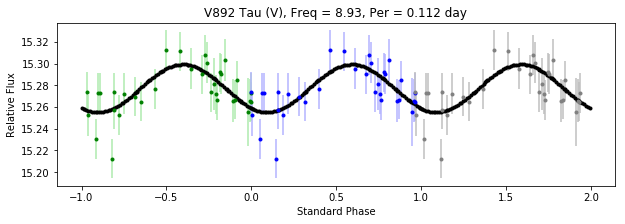

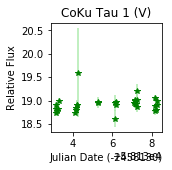

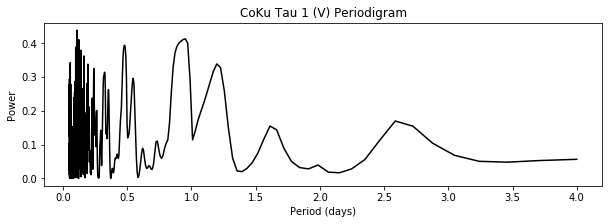

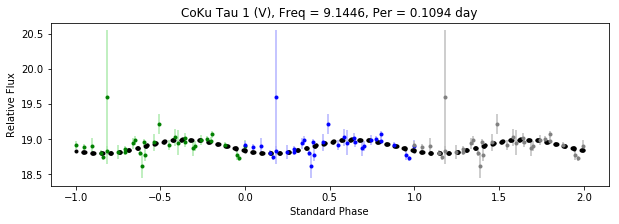

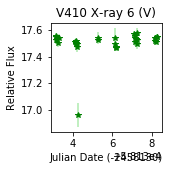

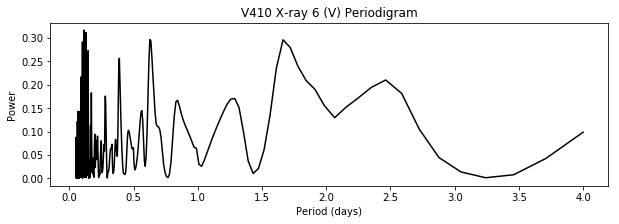

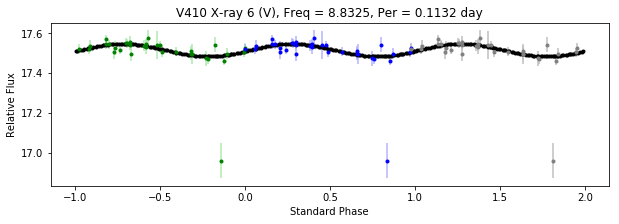

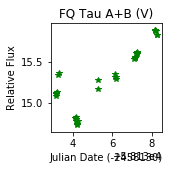

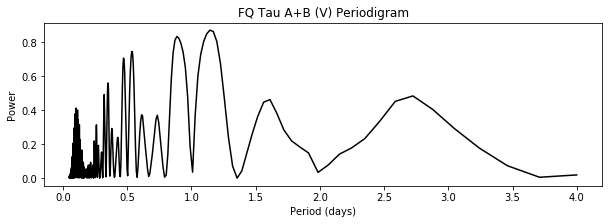

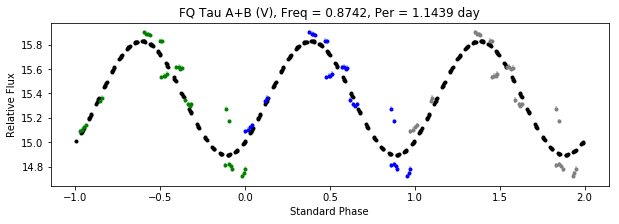

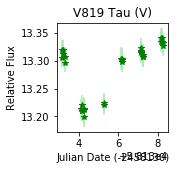

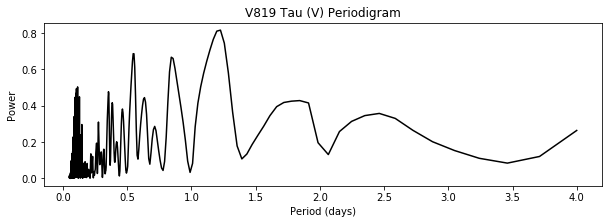

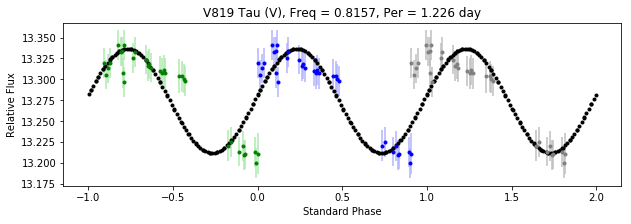

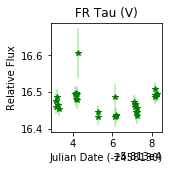

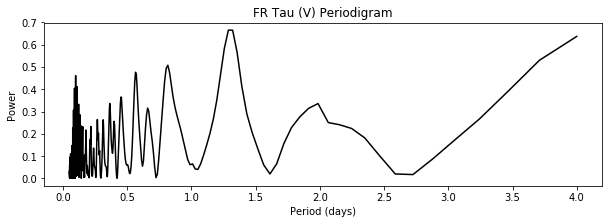

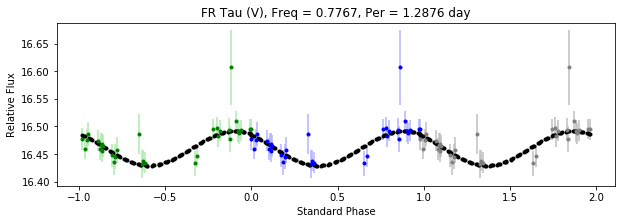

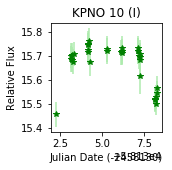

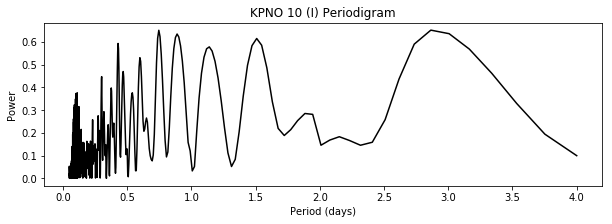

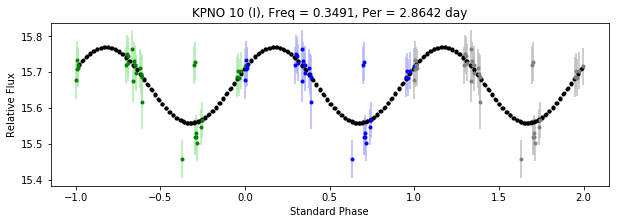

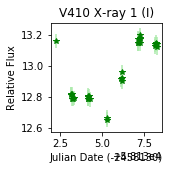

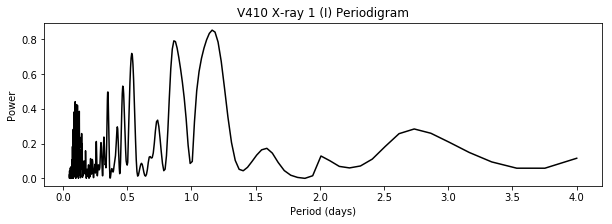

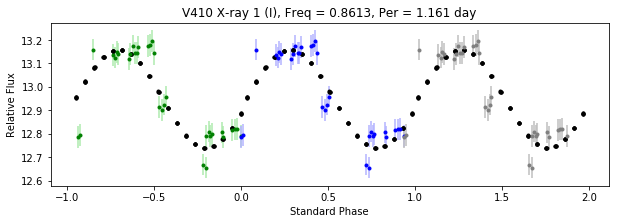

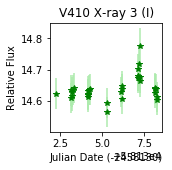

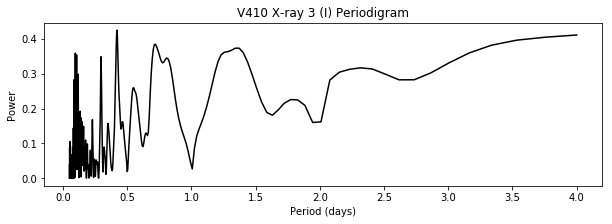

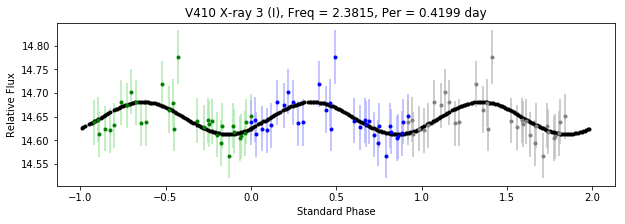

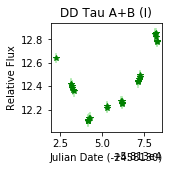

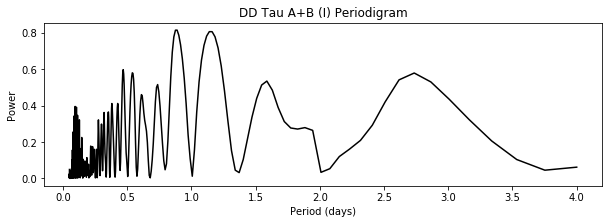

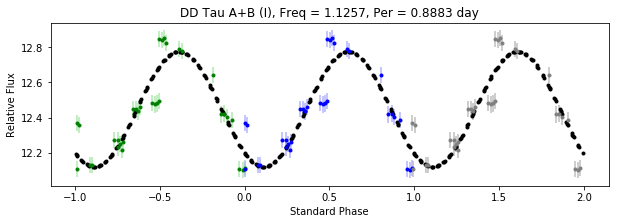

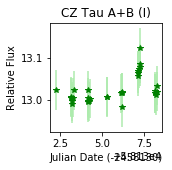

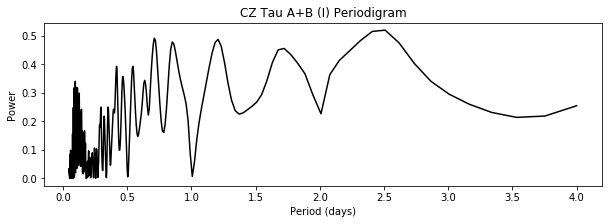

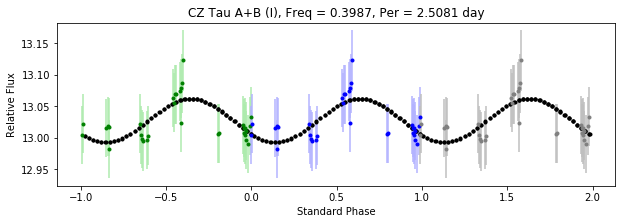

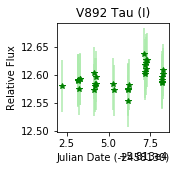

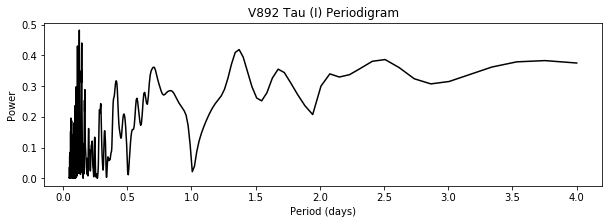

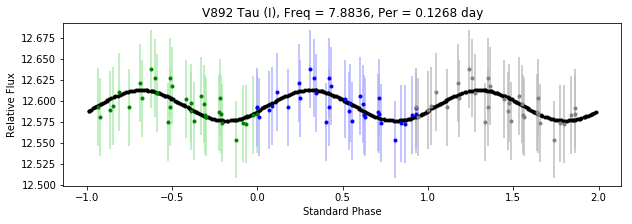

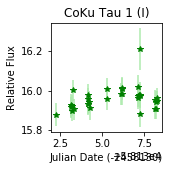

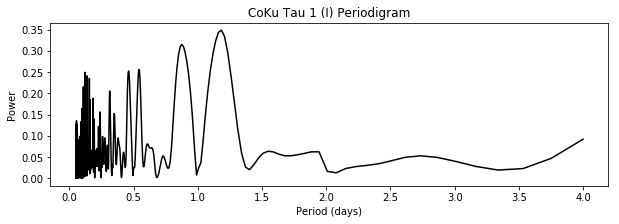

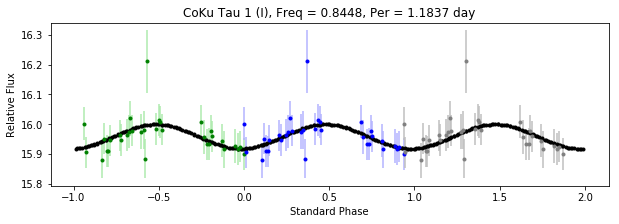

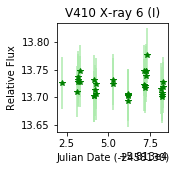

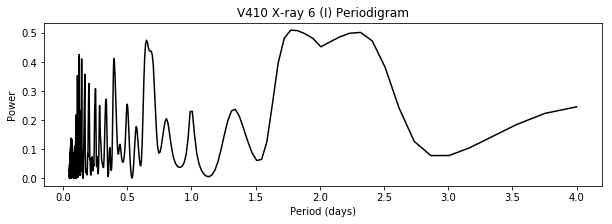

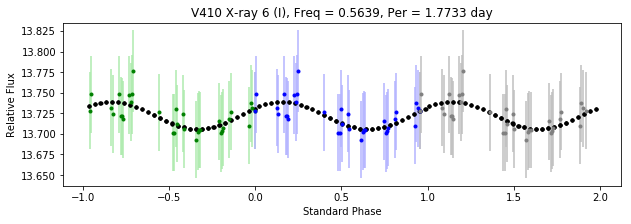

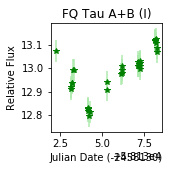

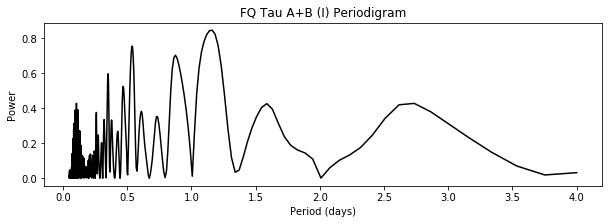

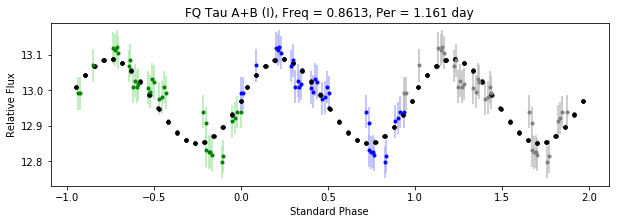

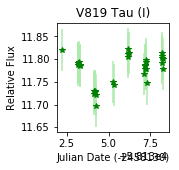

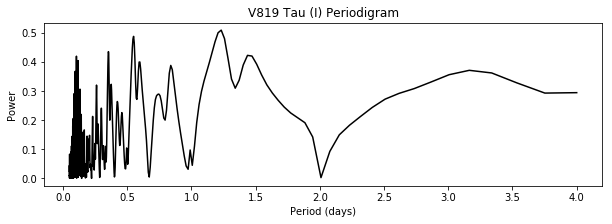

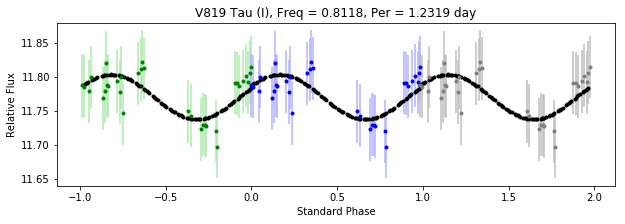

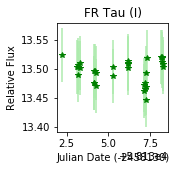

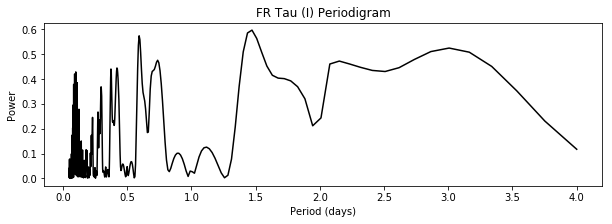

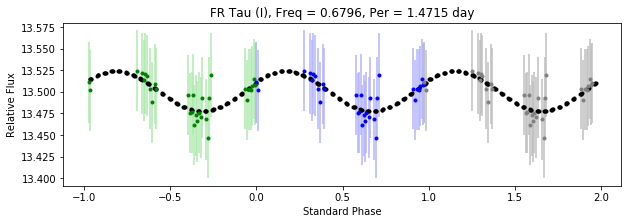

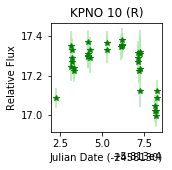

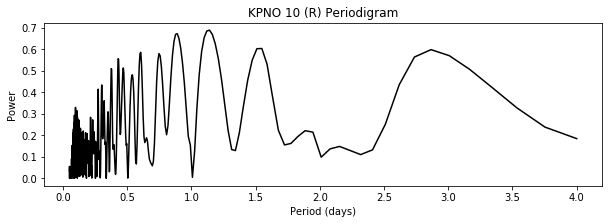

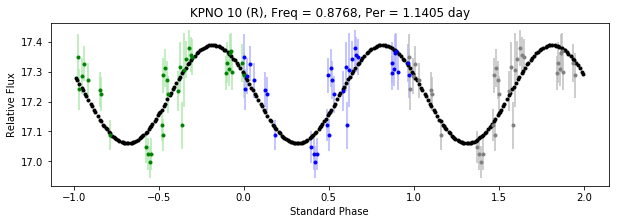

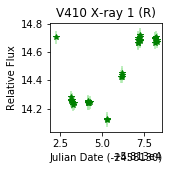

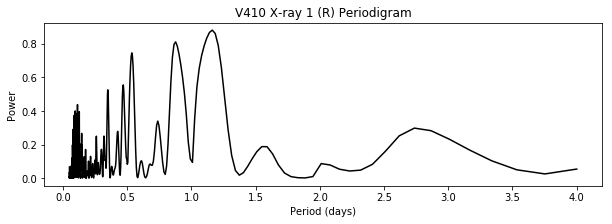

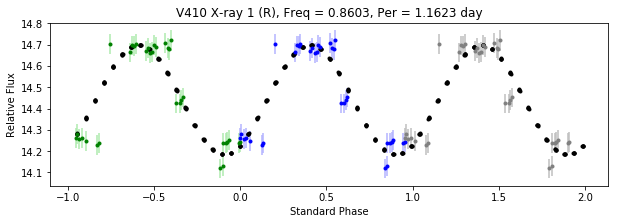

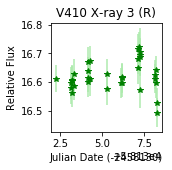

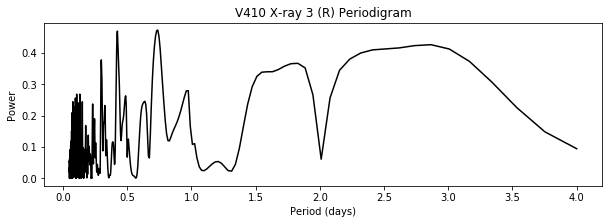

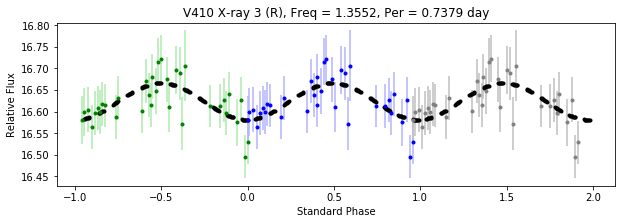

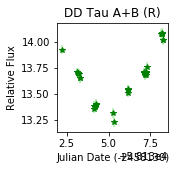

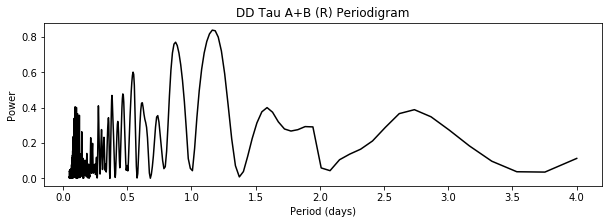

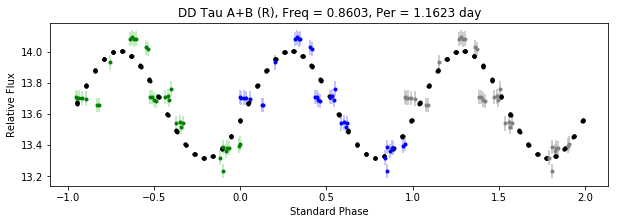

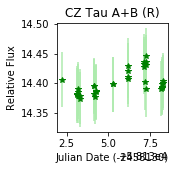

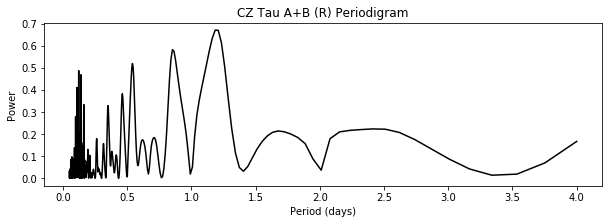

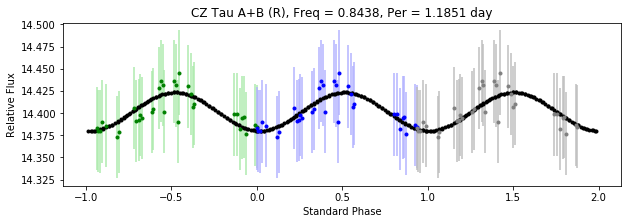

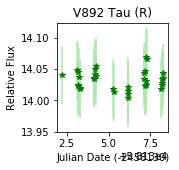

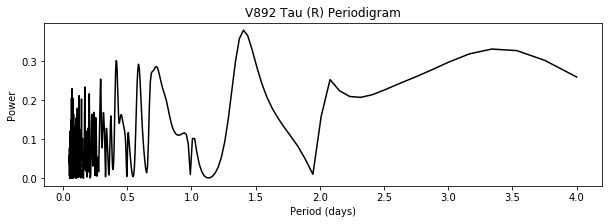

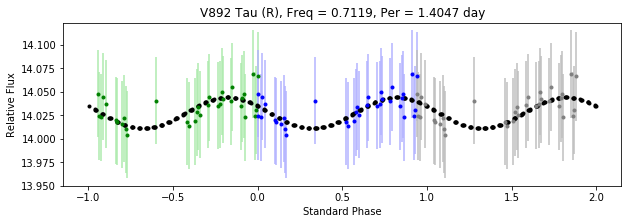

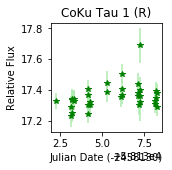

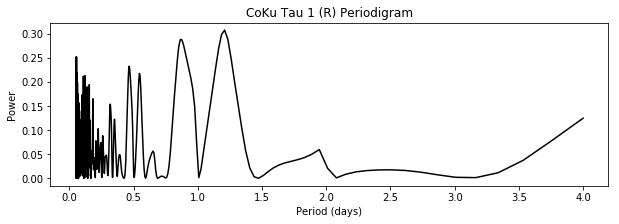

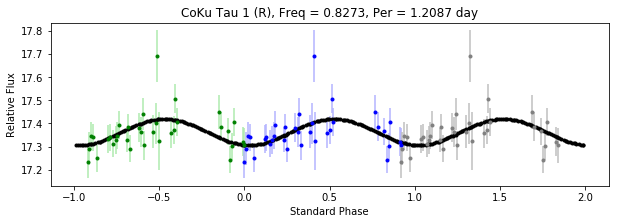

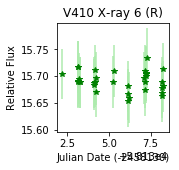

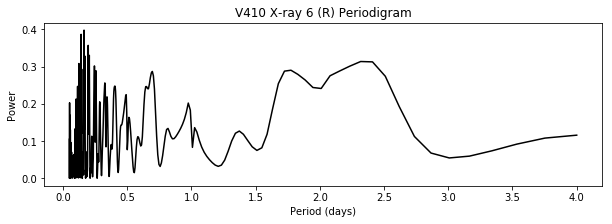

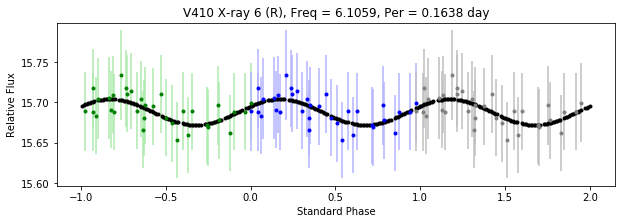

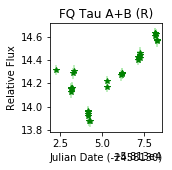

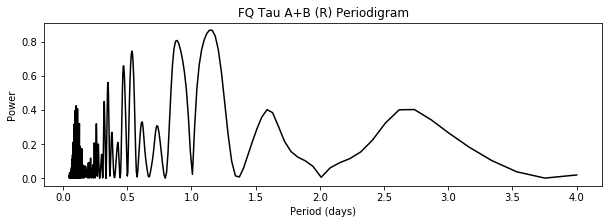

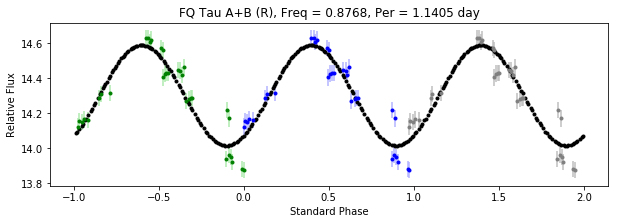

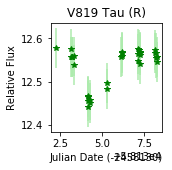

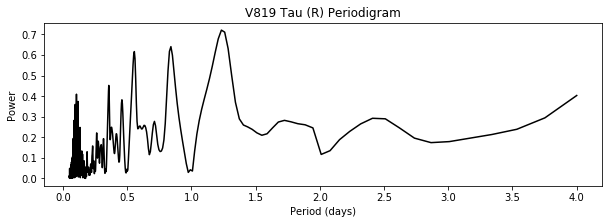

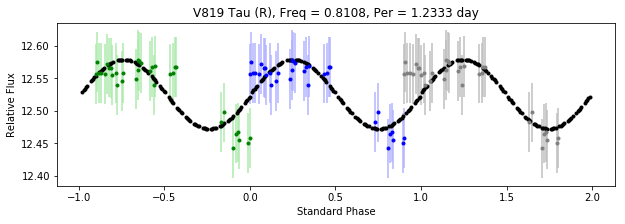

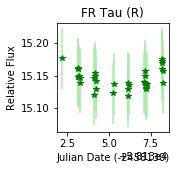

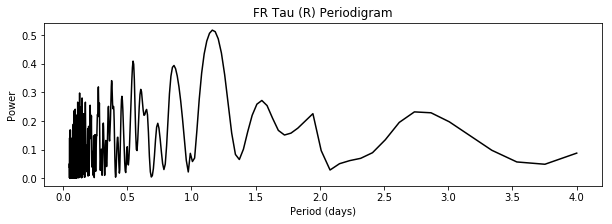

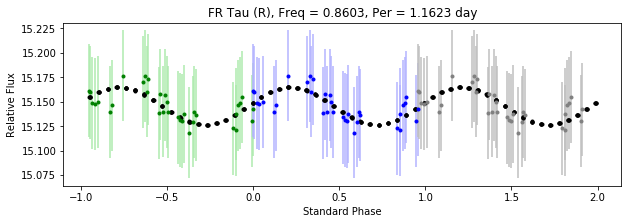

In [56]:

all_targ_data_d = {} #setting up dictionaries for data/emptying previous dictionaries
all_targ_err_d = {}
period_data_d = {}
time_data_d = {}
for ind,filt in enumerate(filters):
    data_dir = direct+'/Data/'+filt+'_Combined/'+field+'/' #getting specific filter

    #Assuming the code is at top and files with diff photometry data are under data, then in filter_Combined
        #Base_directory/Data/Filter_Combined
        #EX: MirSD/Data/I_Combined
    
    if old==1:
        files = glob.glob(data_dir+'*_Quad_'+filt+'.csv')
    if old==0:
#FIGURE OUT THE NEW NAMING CONVENTION
        files = glob.glob(data_dir+field+'target_star_data_'+filt+year+'*.csv')
    #files = glob.glob(data_dir+'*.csv') #grabbing files with data

    pot_bad_frames = []
    for t_ind in range(len(files)):
        data = pd.read_csv(files[t_ind]) #reading in files to data frame
        
        
        if old==1:
            jd_time_24e5 = (data.JD_UTC-2458130) #time of observations, subtracting the base number to avoid annoyance
            tar_data_name = 'rel_flux_T'
            tar_err_name = 'rel_flux_err_T'
        elif old==0:
            jd_time_24e5 = (data['J.D.-240000'])
            tar_data_name = 'calmag'
            tar_err_name = 'cal_magerr_'
        targ = data.filter(regex=tar_data_name) #creating new dataframe with all the targets in the data frame
        targ_err = data.filter(regex=tar_err_name) #creating new dataframe with all the target errors in the data frame
        #comp = data.filter(regex='rel_flux_C') #creating new dataframe with all the comparison stars in the data frame
        #comp_err = data.filter(regex='rel_flux_err_C') #creating new dataframe with all the comparison stars errors in the data frame
        
        #CHANGE IF DIFFERNT FILE STRUCTURE
        cut = field+'/' #grabbing quadrant of data from data titles
        shortname = files[t_ind].split(cut)
        cut = '_'+filt+'.csv'
        shortname1 = shortname[1].split(cut)
    
        temp_col_name = [] #setting up temp lists for names
        temp_col_err = []
        new_col_name = []
        new_col_err = []
        for ind in range(0,len(targ.columns)): #indexed over all the targets
            test_targ_n = targ.iloc[:,ind] #the singular target
            test_targ_err_n = targ_err.iloc[:,ind] #and it's error
            
            for aa in range(0,len(test_targ_n)): #testing for bad pictures
                if test_targ_err_n[aa]>(2*np.average(test_targ_err_n)):
                    pot_bad_frames.append(data.Label[aa]) #storing potentially bad frames
                    test_targ_n[aa] = 'NaN' #replacing bad points with nans
                    test_targ_err_n[aa] = 'NaN'
            
            #making a new plot for light curve
            fig, ax = plt.subplots(figsize=(2,2)) #making a new plot for light curve
            plt.errorbar(jd_time_24e5, targ.iloc[:,ind], targ_err.iloc[:,ind], fmt='*', color='green', ecolor='#adebad') #plot one targ
            plt.ylabel('Relative Flux')
            plt.xlabel('Julian Date (-2458130)')
            
            #making a new name for the column w/ quadrant
            if old == 1:
                temp_col_name.append(shortname1[0]+' '+targ.columns[ind]) 
                temp_col_err.append(shortname1[0]+' '+targ_err.columns[ind]) #and also it's error
                new_col_name.append(targ_names[temp_col_name[ind]])
                new_col_err.append(targ_err_names[temp_col_err[ind]])
            if old == 0:
                new_col_name.append(targ_names[targ.columns[ind]])
                new_col_err.append(targ_err_names[targ_err.columns[ind]])
            plt.title(new_col_name[ind]+' ('+filt+')')
            
            #if filt=='I':
                #plt.savefig(new_col_name[ind]+' ('+filt+')'+'.png')
            
            #getting rid of nans before LombScargle

            test_targ = test_targ_n[-np.isnan(test_targ_err_n)] 
            test_targ_err = test_targ_err_n[-np.isnan(test_targ_err_n)]
            time = jd_time_24e5[-np.isnan(test_targ_err_n)]
            
            #Lomb-Scargle
            lmscgl = LombScargle(time, test_targ, test_targ_err) #setting up a LombScargle periodigram
            frequency, power = lmscgl.autopower(nyquist_factor=nyq, minimum_frequency = min_freq, maximum_frequency = max_freq, samples_per_peak=10) #getting freq and power data
            #frequency, power = lmscgl.autopower() #getting freq and power data
            period_days = 1./frequency #period in days
            
            fig, ax = plt.subplots(figsize=(10,3)) #setting up a new plot
            plt.plot(period_days,power,'k')
            plt.ylabel('Power')
            plt.xlabel('Period (days)')
            plt.title(new_col_name[ind]+' ('+filt+') Periodigram')
            
            best_frequency = frequency[np.argmax(power)] 
            best_period = period_days[np.argmax(power)] # units are still in days...
            
            #if abs(1-best_period)<=window:
            #    period_test = period_days
            #    w = np.where(np.logical_and(period_test>=(1-window), period_test<=(1+window)))
            #    n_power = np.delete(power,w)
            #    best_period = period_test[np.argmax(n_power)]
            #if best_period==(1/min_freq):
            #    period_test = period_days
            #    w = np.where(np.logical_and(period_test>=((1/min_freq)-window), period_test<=((1/min_freq))))
            #    n_power = np.delete(power,w)
            #    best_period = period_test[np.argmax(n_power)]
            
#TO CHANGE TIME EPOCH LOOK HERE
            time_ep = time[2] #time epoch to test phase against CHANGE
            phase_data = ((time-time_ep)/best_period) #phase
            stnd_phase_data = phase_data%1 #normalized phase
                
            time_model = np.linspace(np.min(time), np.max(time), 100) #a model of the time
            mag_model = LombScargle(time, test_targ, test_targ_err).model(time_model, best_frequency) #model of the best period
            phase_LS = ((time_model-time_ep)/best_period) #phase from the model
            stnd_phase_LS = phase_LS%1 #normalized phase from the model
            
            #making a new plot for periodigram
            fig, ax = plt.subplots(figsize=(10,3)) #setting up a new plot
            plt.plot(stnd_phase_LS, mag_model, 'k.') #plot the model normal phase
            plt.plot(stnd_phase_LS+-np.max(stnd_phase_LS), mag_model, 'k.') #as well as model +phase
            plt.plot(stnd_phase_LS+np.max(stnd_phase_LS), mag_model, 'k.') #and model -phase
               
            plt.errorbar(stnd_phase_data + -np.max(stnd_phase_data), test_targ, test_targ_err, fmt='.', color='green', ecolor='#adebad') #-phase data
            plt.errorbar(stnd_phase_data + 0, test_targ, test_targ_err, fmt='.', color='blue', ecolor='#b3b3ff') #normal phase data
            plt.errorbar(stnd_phase_data + np.max(stnd_phase_data), test_targ, test_targ_err, fmt='.', color='gray', ecolor='0.75') #+phase data
               
            plt.xlabel('Standard Phase')
            plt.ylabel('Relative Flux')
            plt.title(new_col_name[ind]+' ('+filt+')'+', '+'Freq = '+str(round(best_frequency,4))+', Per = '+str(round(best_period,4))+' day')
            #plt.savefig(new_col_name[ind]+'_'+filt+'_'+'Freq_'+str(round(best_frequency,4))+'Per_'+str(round(best_period,4))+'.pdf')
            
            target_stuff = np.vstack([targ.iloc[:,ind].values[:], np.array(jd_time_24e5)])
            
            #setting up temp dictionaries with data
            targ_data = {(new_col_name[ind],filt):target_stuff} #targ data dict
            targ_err_data = {(new_col_name[ind],filt):targ_err.iloc[:,ind].values[:]} #targ err dict
            period_data = {(new_col_name[ind],filt):best_period} #best periods for all bands/stars
            
            #updating overall dictionaries with new data
            all_targ_data_d.update(targ_data) #all targ data dict
            all_targ_err_d.update(targ_err_data) #all targ err dict
            period_data_d.update(period_data) #all period data
        
#saving dictionaries to Series DataFrame
all_targ_data = pd.Series(all_targ_data_d)
all_targ_data_err = pd.Series(all_targ_err_d)
all_per_data = pd.Series(period_data_d)


In [57]:
filters = ['V','I','R']
for filt in range(0,len(filters)):
    for jj, name in enumerate(names_of_targs):
        np.savetxt(direct+'/'+name+'/'+name+'_'+year+'_'+filters[filt]+'.csv',all_targ_data[name,filters[filt]][0],delimiter=",")
        np.savetxt(direct+'/'+name+'/'+name+'_'+year+'_'+filters[filt]+'t.csv',all_targ_data[name,filters[filt]][1],delimiter=",")
        np.savetxt(direct+'/'+name+'/'+name+'_'+year+'_'+filters[filt]+'e.csv',all_targ_data_err[name,filters[filt]],delimiter=",")

In [53]:
all_targ_data_err[name,'V']

array([0.03225729,        nan, 0.01901933, 0.02630059, 0.0190956 ,
       0.01900791, 0.01915194, 0.02041552, 0.02103548, 0.01950638,
       0.01952909, 0.02029559, 0.01911293, 0.01941005, 0.01943507,
       0.01982461, 0.01970119, 0.02206201, 0.02463371, 0.02295022])

# Hierarchical calling for the all targ, all filt dataframes
1) Just the name will call everything with that name. Includes flux data (first row) and time data (second row) <p>
    <pre><i>Ex: all_targ_data['FR Tau'] gets you all the filters of FR Tau</i></pre> <p>
2) Getting everything in a filter requires a colon. <p>
    <pre><i>Ex: all_targ_data[:,'V'] gets you all the targets' V data</i></pre> <p>
3) Want the specific filter in a specific target? Combine the two. <p>
    <pre><i>Ex: all_targ_data['FR Tau','V'] gets FR Tau's V band data in an array</i></pre> <p>
4) Flux data is the first row, so call with [0] <p>
    <pre><i>Ex: all_targ_data['FR Tau','V'][0] gets you just the flux data for FR Tau in V</i></pre> <p>
5) Time for data is the second row, so call with [1] <p>
    <pre><i>Ex: all_targ_data['FR Tau','V'][1] gets you just the time data for FR Tau in V</i></pre> <p>
    
## Nice Documentation:

https://jakevdp.github.io/PythonDataScienceHandbook/03.05-hierarchical-indexing.html

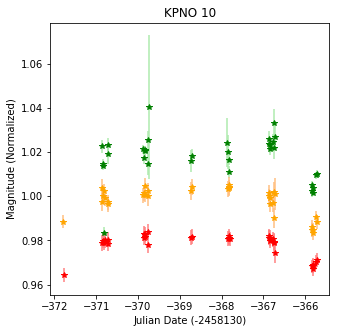

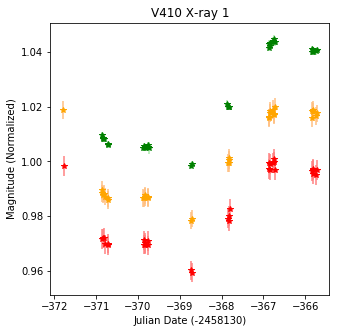

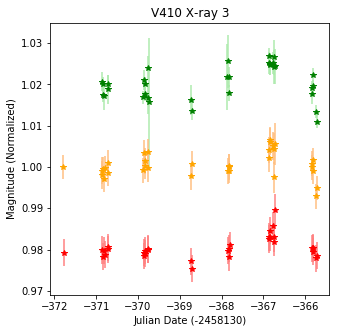

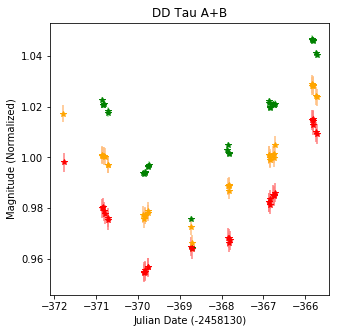

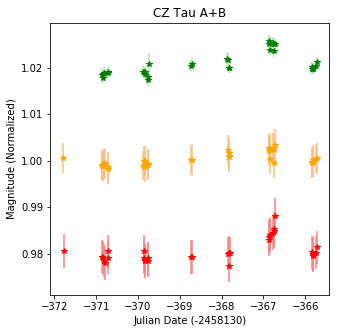

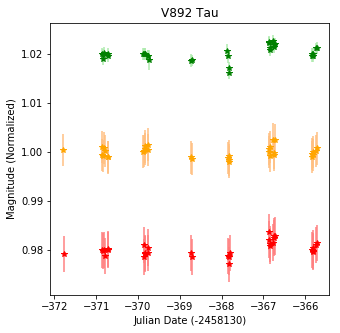

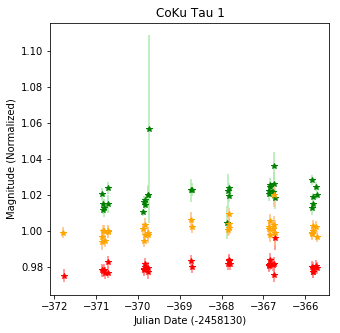

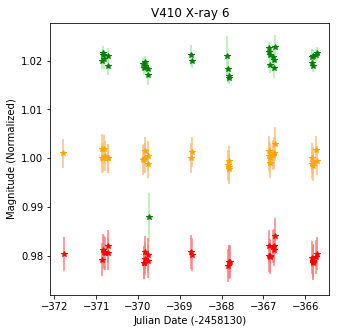

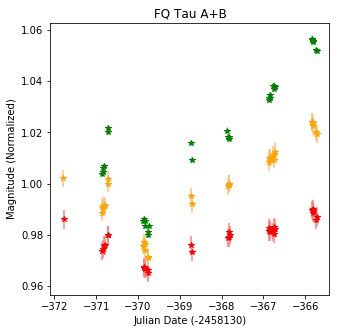

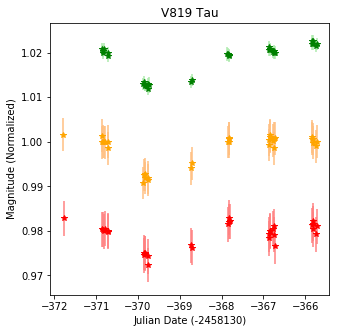

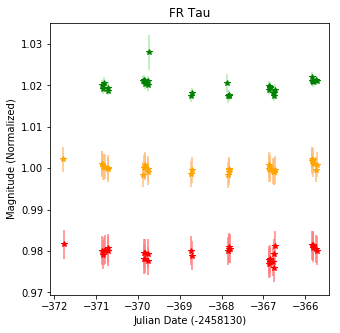

In [22]:
for ind in range(0,len(all_targ_data[:,'V'])):
    try:
        s_targ = names_of_targs[ind]
        v_norm = (all_targ_data[s_targ,'V'][0])/np.nanmedian(all_targ_data[s_targ,'V'][0])
        v_nerr = v_norm*(all_targ_data_err[s_targ,'V']/np.nanmedian(all_targ_data[s_targ,'V'][0]))
        i_norm = (all_targ_data[s_targ,'I'][0])/np.nanmedian(all_targ_data[s_targ,'I'][0])
        i_nerr = i_norm*(all_targ_data_err[s_targ,'I']/np.nanmedian(all_targ_data[s_targ,'I'][0]))
        r_norm = (all_targ_data[s_targ,'R'][0])/np.nanmedian(all_targ_data[s_targ,'R'][0])
        r_nerr = r_norm*(all_targ_data_err[s_targ,'R']/np.nanmedian(all_targ_data[s_targ,'R'][0]))
        fig, ax = plt.subplots(figsize=(5,5)) #making a new plot
        plt.errorbar(all_targ_data[s_targ,'V'][1], v_norm+0.02, v_nerr, fmt='*', color='green', ecolor='#adebad') #plot one targ
        plt.errorbar(all_targ_data[s_targ,'I'][1], i_norm-0.02, i_nerr, fmt='*', color='red', ecolor='#ff8080') #plot one targ
        plt.errorbar(all_targ_data[s_targ,'R'][1], r_norm, r_nerr, fmt='*', color='orange', ecolor='#ffbf80') #plot one targ
        plt.ylabel('Magnitude (Normalized)')
        plt.xlabel('Julian Date (-2458130)')
        plt.title(s_targ)
    except:
        pass

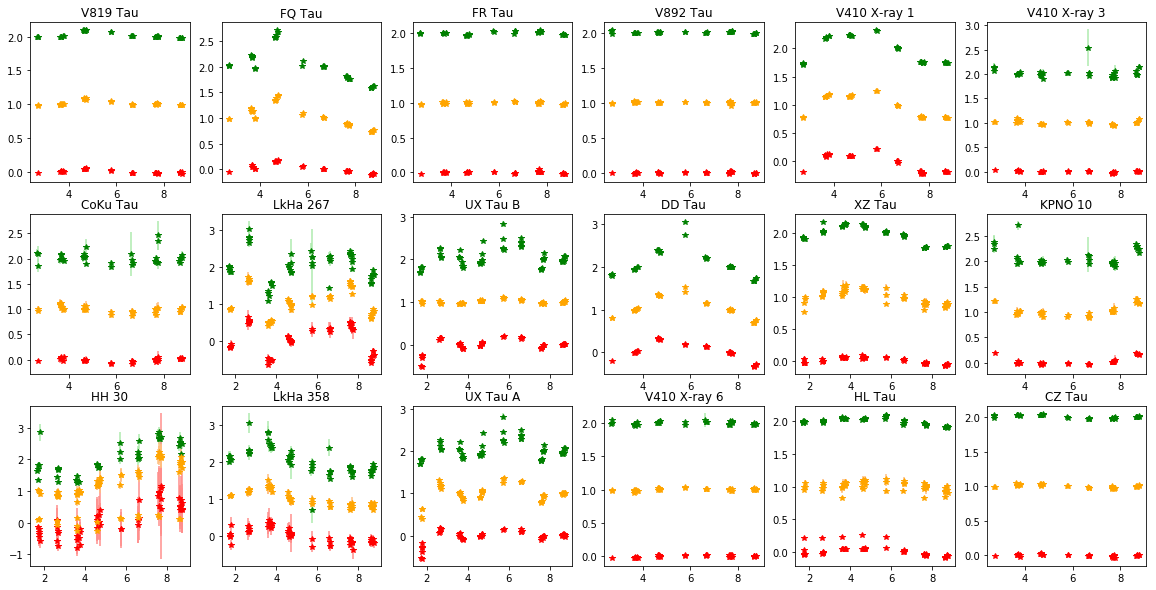

In [12]:
fig, ax = plt.subplots(nrows = 3, ncols = 6, figsize=(20,10)) #making a new plot

for ind in range(0,len(all_targ_data[:,'V'])):
    try:
        s_targ = names_of_targs[ind]
        v_norm = (all_targ_data[s_targ,'V'][0])/np.nanmedian(all_targ_data[s_targ,'V'][0])
        v_nerr = v_norm*(all_targ_data_err[s_targ,'V']/np.nanmedian(all_targ_data[s_targ,'V'][0]))
        i_norm = (all_targ_data[s_targ,'I'][0])/np.nanmedian(all_targ_data[s_targ,'I'][0])
        i_nerr = i_norm*(all_targ_data_err[s_targ,'I']/np.nanmedian(all_targ_data[s_targ,'I'][0]))
        r_norm = (all_targ_data[s_targ,'R'][0])/np.nanmedian(all_targ_data[s_targ,'R'][0])
        r_nerr = r_norm*(all_targ_data_err[s_targ,'R']/np.nanmedian(all_targ_data[s_targ,'R'][0]))
        if ind<=5:
            row = 0
            column = ind
        elif 5<ind<=11:
            row = 1
            column = ind-(6)
        else:
            row = 2
            column = ind-(12)
        ax[row,column].errorbar(all_targ_data[s_targ,'V'][1], v_norm+1, v_nerr, fmt='*', color='green', ecolor='#adebad') #plot one targ
        ax[row,column].errorbar(all_targ_data[s_targ,'I'][1], i_norm-1, i_nerr, fmt='*', color='red', ecolor='#FF8D8B') #plot one targ
        ax[row,column].errorbar(all_targ_data[s_targ,'R'][1], r_norm, r_nerr, fmt='*', color='orange', ecolor='#ffbf80') #plot one targ
        ax[row,column].set_title(s_targ)
        
    except:
        pass


In [89]:
all_targ_data

V410 X-ray 1  V    [[16.307697988271567, 16.264564352588977, 16.5...
V410 X-ray 3  V    [[18.16565138329761, nan, 18.33372851282134, 1...
DD Tau A+B    V    [[14.072073428471233, nan, 15.028906115461464,...
CZ Tau A+B    V    [[15.389209173244016, 15.299408426935784, 15.3...
V892 Tau      V    [[15.25709715181374, nan, 15.23421012547842, 1...
V410 X-ray 6  V    [[17.51514396345722, nan, 17.537669192569258, ...
FQ Tau A+B    V    [[15.687232586316036, nan, 15.850385337376196,...
V819 Tau      V    [[13.271942901757456, nan, 13.264121012791458,...
FR Tau        V    [[16.392561393435034, 16.76690002247712, 16.40...
V410 X-ray 1  I    [[12.976597425195324, 12.976438514526055, 13.0...
V410 X-ray 3  I    [[14.769650234396, 14.762044140747829, 14.7700...
DD Tau A+B    I    [[12.516769700860909, 12.475621063586766, 12.4...
CZ Tau A+B    I    [[13.106783018403899, 13.107861128392402, 13.0...
V892 Tau      I    [[12.688367619592444, 12.68134979621172, 12.68...
V410 X-ray 6  I    [[13.8252393835

/Users/mirandaeiben/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


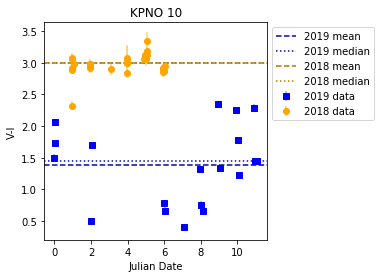

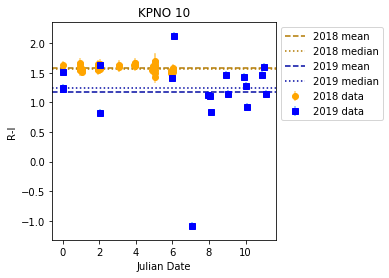

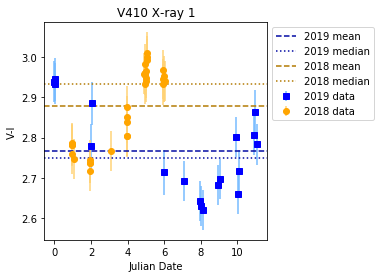

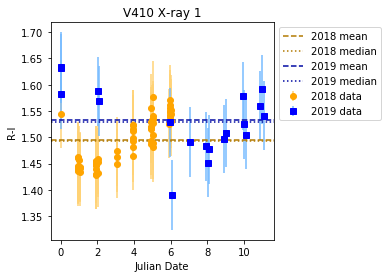

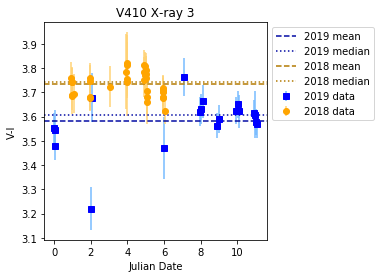

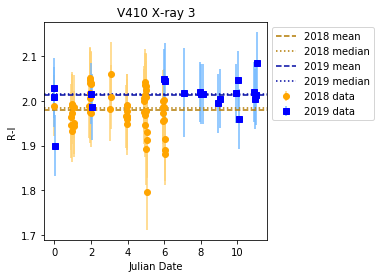

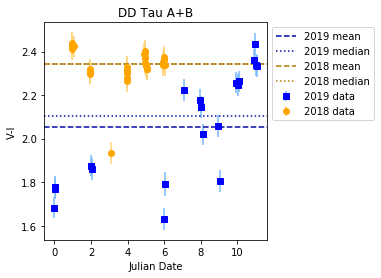

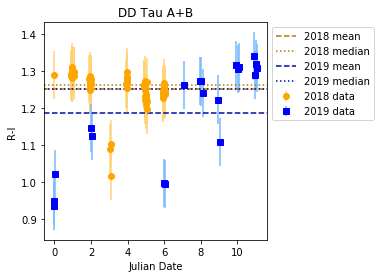

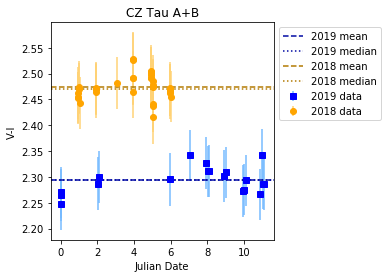

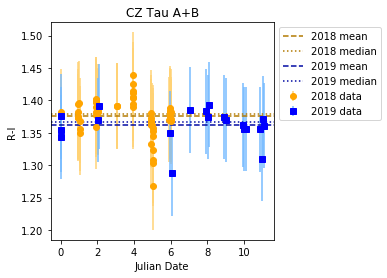

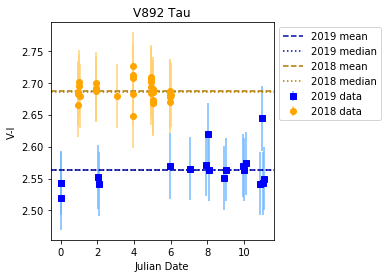

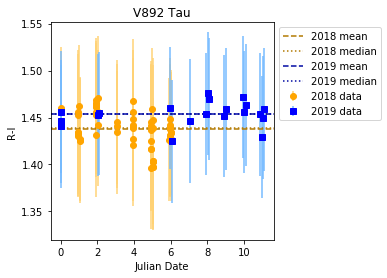

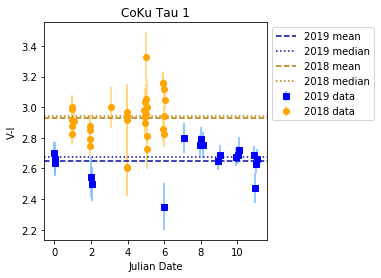

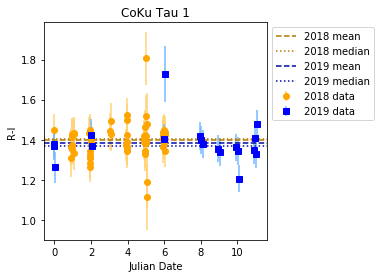

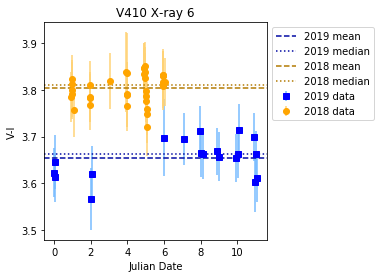

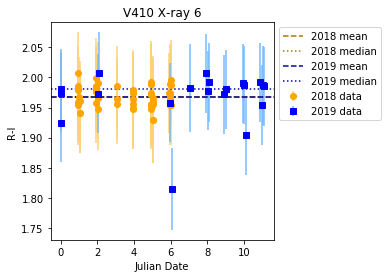

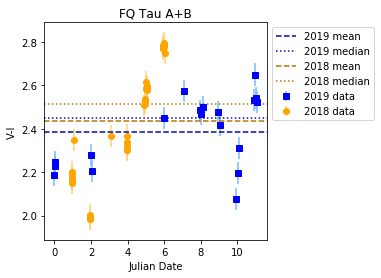

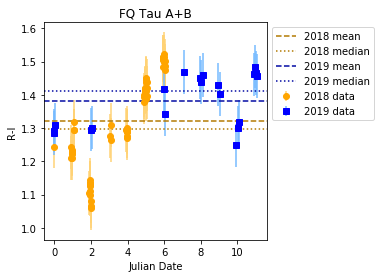

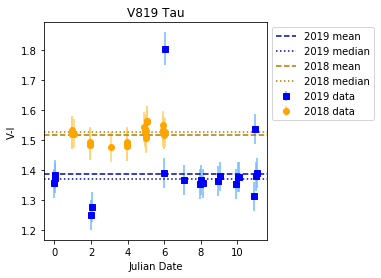

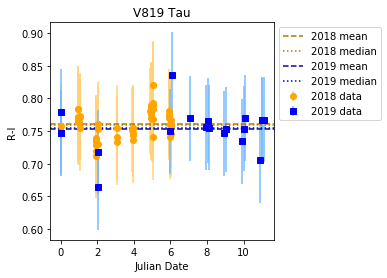

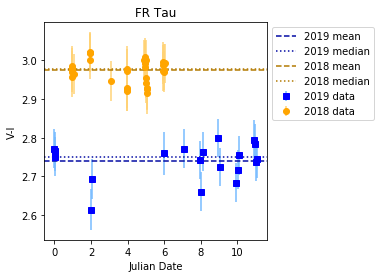

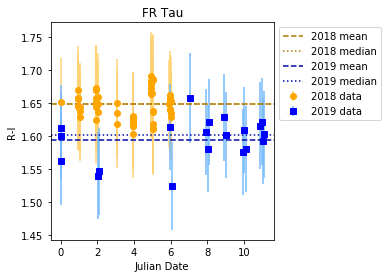

In [34]:
for ind in range(0,len(names_of_targs)):

    target = names_of_targs[ind]
    
    v_data_19 = genfromtxt(direct+'/'+target+'/'+target+'_2019_V.csv', delimiter=',')
    v_time_19 = genfromtxt(direct+'/'+target+'/'+target+'_2019_Vt.csv', delimiter=',')
    v_time_19 = v_time_19-np.min(v_time_19)
    v_nerr_19 = genfromtxt(direct+'/'+target+'/'+target+'_2019_Ve.csv', delimiter=',')
    
    i_data_19 = genfromtxt(direct+'/'+target+'/'+target+'_2019_I.csv', delimiter=',')
    i_time_19 = genfromtxt(direct+'/'+target+'/'+target+'_2019_It.csv', delimiter=',')
    i_time_19 = i_time_19-np.min(i_time_19)
    i_nerr_19 = genfromtxt(direct+'/'+target+'/'+target+'_2019_Ie.csv', delimiter=',')
    
    r_data_19 = genfromtxt(direct+'/'+target+'/'+target+'_2019_R.csv', delimiter=',')
    r_time_19 = genfromtxt(direct+'/'+target+'/'+target+'_2019_Rt.csv', delimiter=',')
    r_time_19 = r_time_19-np.min(r_time_19)
    r_nerr_19 = genfromtxt(direct+'/'+target+'/'+target+'_2019_Re.csv', delimiter=',')
    
    v_data_18 = genfromtxt(direct+'/'+target+'/'+target+'_2018_V.csv', delimiter=',')
    v_time_18 = genfromtxt(direct+'/'+target+'/'+target+'_2018_Vt.csv', delimiter=',')
    v_time_18 = v_time_18-np.min(v_time_18)
    v_nerr_18 = genfromtxt(direct+'/'+target+'/'+target+'_2018_Ve.csv', delimiter=',')
    
    i_data_18 = genfromtxt(direct+'/'+target+'/'+target+'_2018_I.csv', delimiter=',')
    i_time_18 = genfromtxt(direct+'/'+target+'/'+target+'_2018_It.csv', delimiter=',')
    i_time_18 = i_time_18-np.min(i_time_18)
    i_nerr_18 = genfromtxt(direct+'/'+target+'/'+target+'_2018_Ie.csv', delimiter=',')
    
    r_data_18 = genfromtxt(direct+'/'+target+'/'+target+'_2018_R.csv', delimiter=',')
    r_time_18 = genfromtxt(direct+'/'+target+'/'+target+'_2018_Rt.csv', delimiter=',')
    r_time_18 = r_time_18-np.min(r_time_18)
    r_nerr_18 = genfromtxt(direct+'/'+target+'/'+target+'_2018_Re.csv', delimiter=',')
    
    VI_color_18 = []
    RI_color_18 = []
    VI_time_18 = []
    RI_time_18 = []
    VI_err_18 = []
    RI_err_18 = []
    
    VI_color_19 = []
    RI_color_19 = []
    VI_time_19 = []
    RI_time_19 = []
    VI_err_19 = []
    RI_err_19 = []
        
    for itim in range(0,len(i_time_19)):
        for vtim in range(0,len(v_time_19)):
            if np.abs(v_time_19[vtim] - i_time_19[itim]) < 0.015:
                #print(v_data[itim]-i_data[itim])
                VI_color_19.append(v_data_19[vtim]-i_data_19[itim])
                VI_time_19.append(i_time_19[itim])
                VI_err_19.append(np.sqrt(np.square(v_nerr_19[vtim])+np.square(i_nerr_19[itim])))
                
        for rtim in range(0,len(r_time_19)):
            if np.abs(r_time_19[rtim] - i_time_19[itim]) < 0.015:
                RI_color_19.append(r_data_19[rtim]-i_data_19[itim]) 
                RI_time_19.append(i_time_19[itim])
                RI_err_19.append(np.sqrt(np.square(r_nerr_19[rtim])+np.square(i_nerr_19[itim])))
    for itim in range(0,len(i_time_18)):
        for vtim in range(0,len(v_time_18)):
            if np.abs(v_time_18[vtim] - i_time_18[itim]) < 0.015:
                #print(v_data[itim]-i_data[itim])
                VI_color_18.append(v_data_18[vtim]-i_data_18[itim])
                VI_time_18.append(i_time_18[itim])
                VI_err_18.append(np.sqrt(np.square(v_nerr_18[vtim])+np.square(i_nerr_18[itim])))
                
        for rtim in range(0,len(r_time_18)):
            if np.abs(r_time_18[rtim] - i_time_18[itim]) < 0.015:
                RI_color_18.append(r_data_18[rtim]-i_data_18[itim]) 
                RI_time_18.append(i_time_18[itim])
                RI_err_18.append(np.sqrt(np.square(r_nerr_18[rtim])+np.square(i_nerr_18[itim])))
    
    
    VI_mean_19 = np.nanmean(VI_color_19)
    VI_med_19 = np.nanmedian(VI_color_19)
    RI_mean_19 = np.nanmean(RI_color_19)
    RI_med_19 = np.nanmedian(RI_color_19)
    
    VI_mean_18 = np.nanmean(VI_color_18)
    VI_med_18 = np.nanmedian(VI_color_18)
    RI_mean_18 = np.nanmean(RI_color_18)
    RI_med_18 = np.nanmedian(RI_color_18)
    
#     plt.plot(stnd_phase_LS_18, mag_model_18,'.',color = '#b27900',label='2018 fit') #plot the model normal phase
#     plt.plot(stnd_phase_LS_18+-np.max(stnd_phase_LS_18), mag_model_18, '.',color = '#b27900') #as well as model +phase
#     plt.plot(stnd_phase_LS_18+np.max(stnd_phase_LS_18), mag_model_18, '.',color = '#b27900') #and model -phase

#     plt.errorbar(stnd_phase_data_18 + -np.max(stnd_phase_data_18), starflux_18, starfluxerr_18, fmt='o', color='orange', ecolor='#ffd275',label='2018 data') #-phase data
#     plt.errorbar(stnd_phase_data_18 + 0, starflux_18, starfluxerr_18, fmt='o', color='orange', ecolor='#ffd275') #normal phase data
#     plt.errorbar(stnd_phase_data_18 + np.max(stnd_phase_data_18), starflux_18, starfluxerr_18, fmt='o', color='orange', ecolor='#ffd275') #+phase data

    
#     plt.plot(stnd_phase_LS_19, mag_model_19, '.',color = '#0008a3') #plot the model normal phase
#     plt.plot(stnd_phase_LS_19+-np.max(stnd_phase_LS_19), mag_model_19, '.',color = '#0008a3',label='2019 fit') #as well as model +phase
#     plt.plot(stnd_phase_LS_19+np.max(stnd_phase_LS_19), mag_model_19, '.',color = '#0008a3') #and model -phase

#     plt.errorbar(stnd_phase_data_19 + -np.max(stnd_phase_data_19), starflux_19, starfluxerr_19, fmt='s', color='blue', ecolor='#75baff',label='2019 data') #-phase data
#     plt.errorbar(stnd_phase_data_19 + 0, starflux_19, starfluxerr_19, fmt='s', color='blue', ecolor='#75baff') #normal phase data
#     plt.errorbar(stnd_phase_data_19 + np.max(stnd_phase_data_19), starflux_19, starfluxerr_19, fmt='s', color='blue', ecolor='#75baff') #+phase data


    
    fig, ax = plt.subplots(figsize=(4,4)) #making a new plot
    plt.errorbar(VI_time_19,VI_color_19,VI_err_19, fmt='s', color='blue', ecolor='#75baff',label='2019 data')
    plt.errorbar(VI_time_18,VI_color_18,VI_err_18, fmt='o', color='orange', ecolor='#ffd275',label='2018 data')
    plt.axhline(y=VI_mean_19, color='#0008a3',label='2019 mean',linestyle='--')
    plt.axhline(y=VI_med_19, color='#0008a3',label='2019 median',linestyle=':')
    plt.axhline(y=VI_mean_18,color = '#b27900',label='2018 mean',linestyle='--')
    plt.axhline(y=VI_med_18,color = '#b27900',label='2018 median',linestyle=':')
    plt.ylabel('V-I')
    plt.xlabel('Julian Date')
    plt.title(target)
    ax.legend(bbox_to_anchor=(1., 1))
    plt.savefig(direct+'/'+target+'/'+target+'_VI.png',bbox_inches='tight')
    
    fig, ax = plt.subplots(figsize=(4,4)) #making a new plot
    plt.errorbar(RI_time_18,RI_color_18,RI_err_18, fmt='o', color='orange', ecolor='#ffd275',label='2018 data')
    plt.errorbar(RI_time_19,RI_color_19,RI_err_19, fmt='s', color='blue', ecolor='#75baff',label='2019 data')
    plt.axhline(y=RI_mean_18, color = '#b27900',label='2018 mean',linestyle='--')
    plt.axhline(y=RI_med_18, color = '#b27900',label='2018 median',linestyle=':')
    plt.axhline(y=RI_mean_19, color='#0008a3',label='2019 mean',linestyle='--')
    plt.axhline(y=RI_med_19, color='#0008a3',label='2019 median',linestyle=':')
    plt.ylabel('R-I')
    plt.xlabel('Julian Date')
    plt.title(target)
    ax.legend(bbox_to_anchor=(1., 1))

    #lgd = ax.legend(handles, labels, bbox_to_anchor=(1.0,1.0))
    plt.savefig(direct+'/'+target+'/'+target+'_RI.png',bbox_inches='tight')
    #plt.savefig(direct+'/'+target+'/'+target+'_RI.png', bbox_extra_artists=(lgd), bbox_inches='tight')

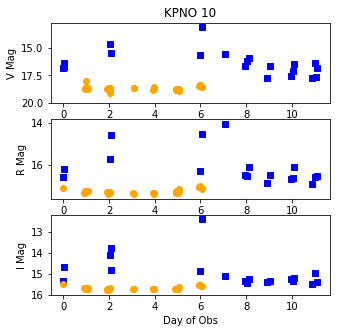

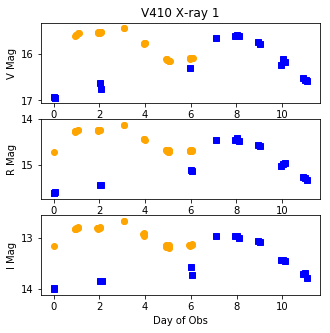

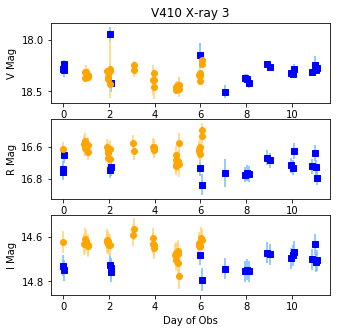

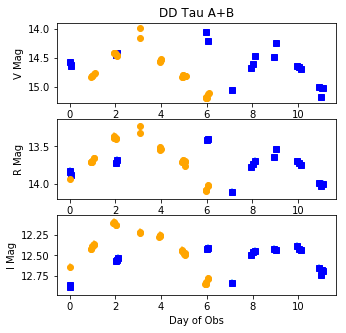

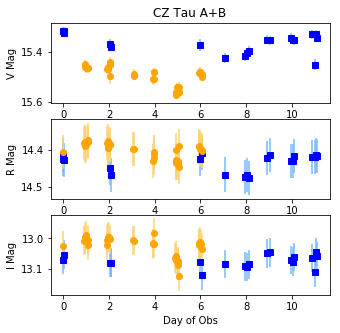

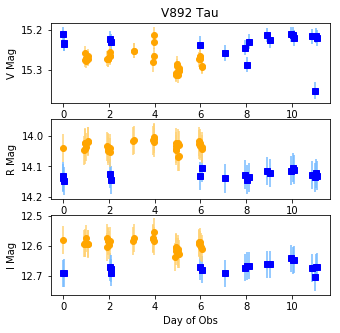

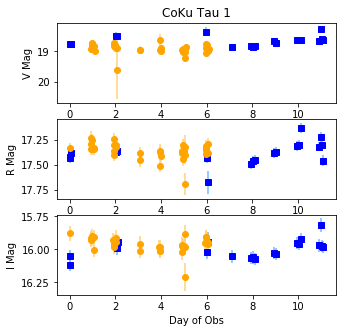

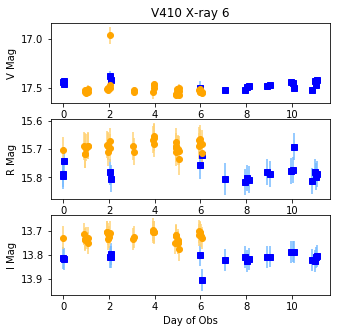

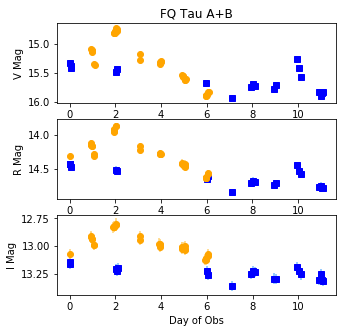

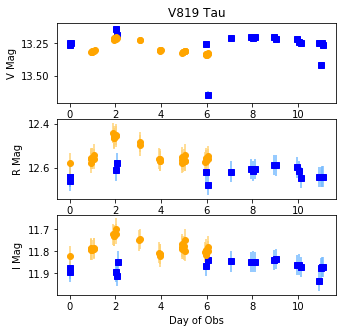

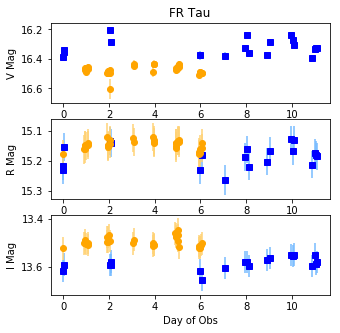

In [21]:
plt.tight_layout()
for ind in range(0,len(names_of_targs)):
    try:
#         s_targ = names_of_targs[ind]
#         v_norm = (all_targ_data[s_targ,'V'][0])/np.nanmedian(all_targ_data[s_targ,'V'][0])
#         v_nerr = v_norm*(all_targ_data_err[s_targ,'V']/np.nanmedian(all_targ_data[s_targ,'V'][0]))
#         i_norm = (all_targ_data[s_targ,'I'][0])/np.nanmedian(all_targ_data[s_targ,'I'][0])
#         i_nerr = i_norm*(all_targ_data_err[s_targ,'I']/np.nanmedian(all_targ_data[s_targ,'I'][0]))
#         r_norm = (all_targ_data[s_targ,'R'][0])/np.nanmedian(all_targ_data[s_targ,'R'][0])
#         r_nerr = r_norm*(all_targ_data_err[s_targ,'R']/np.nanmedian(all_targ_data[s_targ,'R'][0]))
        target = names_of_targs[ind]
    
        v_data_19 = genfromtxt(direct+'/'+target+'/'+target+'_2019_V.csv', delimiter=',')
        v_time_19 = genfromtxt(direct+'/'+target+'/'+target+'_2019_Vt.csv', delimiter=',')
        v_time_19 = v_time_19-np.min(v_time_19)
        v_nerr_19 = genfromtxt(direct+'/'+target+'/'+target+'_2019_Ve.csv', delimiter=',')

        i_data_19 = genfromtxt(direct+'/'+target+'/'+target+'_2019_I.csv', delimiter=',')
        i_time_19 = genfromtxt(direct+'/'+target+'/'+target+'_2019_It.csv', delimiter=',')
        i_time_19 = i_time_19-np.min(i_time_19)
        i_nerr_19 = genfromtxt(direct+'/'+target+'/'+target+'_2019_Ie.csv', delimiter=',')

        r_data_19 = genfromtxt(direct+'/'+target+'/'+target+'_2019_R.csv', delimiter=',')
        r_time_19 = genfromtxt(direct+'/'+target+'/'+target+'_2019_Rt.csv', delimiter=',')
        r_time_19 = r_time_19-np.min(r_time_19)
        r_nerr_19 = genfromtxt(direct+'/'+target+'/'+target+'_2019_Re.csv', delimiter=',')

        v_data_18 = genfromtxt(direct+'/'+target+'/'+target+'_2018_V.csv', delimiter=',')
        v_time_18 = genfromtxt(direct+'/'+target+'/'+target+'_2018_Vt.csv', delimiter=',')
        v_time_18 = v_time_18-np.min(v_time_18)
        v_nerr_18 = genfromtxt(direct+'/'+target+'/'+target+'_2018_Ve.csv', delimiter=',')

        i_data_18 = genfromtxt(direct+'/'+target+'/'+target+'_2018_I.csv', delimiter=',')
        i_time_18 = genfromtxt(direct+'/'+target+'/'+target+'_2018_It.csv', delimiter=',')
        i_time_18 = i_time_18-np.min(i_time_18)
        i_nerr_18 = genfromtxt(direct+'/'+target+'/'+target+'_2018_Ie.csv', delimiter=',')

        r_data_18 = genfromtxt(direct+'/'+target+'/'+target+'_2018_R.csv', delimiter=',')
        r_time_18 = genfromtxt(direct+'/'+target+'/'+target+'_2018_Rt.csv', delimiter=',')
        r_time_18 = r_time_18-np.min(r_time_18)
        r_nerr_18 = genfromtxt(direct+'/'+target+'/'+target+'_2018_Re.csv', delimiter=',')
    
        fig, (ax,ax1,ax2) = plt.subplots(3,figsize=(5,5)) #making a new plot
        ax.errorbar(v_time_19,v_data_19,v_nerr_19,fmt='s',color='blue', ecolor='#75baff')
        ax.errorbar(v_time_18,v_data_18,v_nerr_18,fmt='o',color='orange', ecolor='#ffd275')
        ax.set_ylabel('V Mag')
        ax.set_title(target)
        ax1.errorbar(r_time_19,r_data_19,r_nerr_19,fmt='s',color='blue', ecolor='#75baff')
        ax1.errorbar(r_time_18,r_data_18,r_nerr_18,fmt='o',color='orange', ecolor='#ffd275')
        ax1.set_ylabel('R Mag')
        ax2.errorbar(i_time_19,i_data_19,i_nerr_19,fmt='s',color='blue', ecolor='#75baff')
        ax2.errorbar(i_time_18,i_data_18,i_nerr_18,fmt='o',color='orange', ecolor='#ffd275')
        ax2.set_ylabel('I Mag')
        ax2.set_xlabel('Day of Obs')
        ax.invert_yaxis()
        ax1.invert_yaxis()
        ax2.invert_yaxis()
        plt.savefig(direct+'/'+target+'/'+target+'_raw_mag.png',bbox_inches='tight')
#         plt.errorbar(all_targ_data[s_targ,'V'][1], v_norm+0.02, v_nerr, fmt='*', color='green', ecolor='#adebad') #plot one targ
#         plt.errorbar(all_targ_data[s_targ,'I'][1], i_norm-0.02, i_nerr, fmt='*', color='red', ecolor='#ff8080') #plot one targ
#         plt.errorbar(all_targ_data[s_targ,'R'][1], r_norm, r_nerr, fmt='*', color='orange', ecolor='#ffbf80') #plot one targ
#         plt.ylabel('Magnitude (Normalized)')
#         plt.xlabel('Julian Date (-2458130)')
#         plt.title(s_targ)
    except:
        pass

/Users/astro_student/anaconda/envs/py3k/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


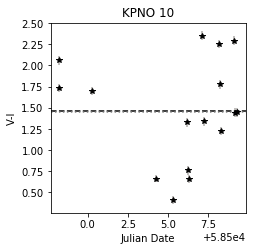

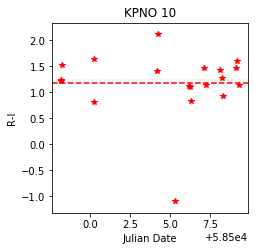

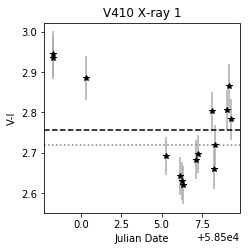

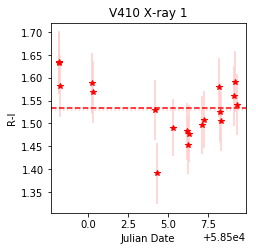

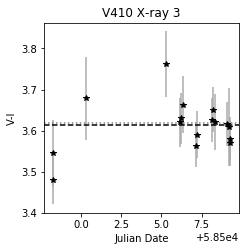

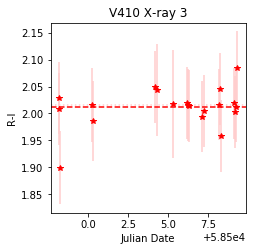

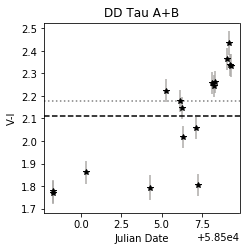

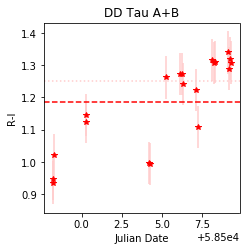

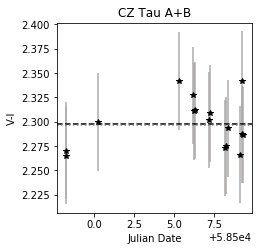

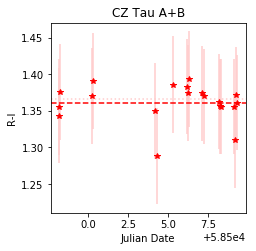

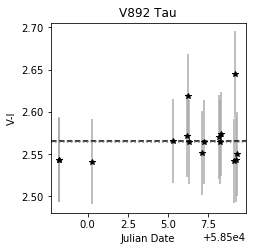

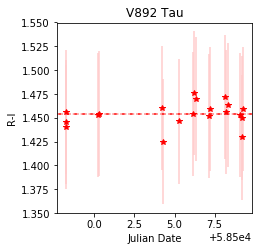

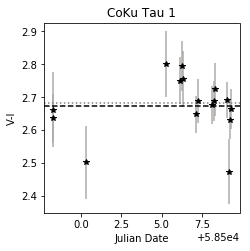

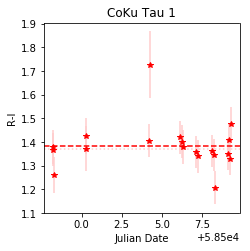

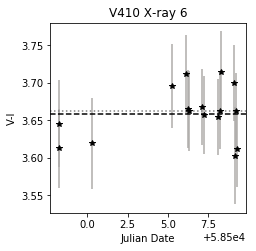

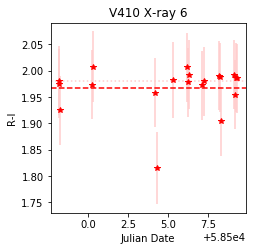

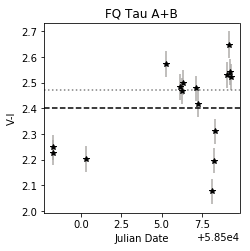

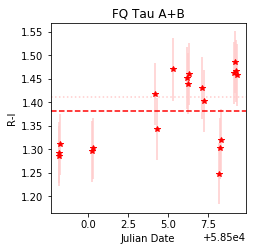

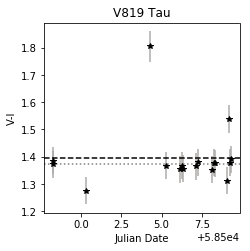

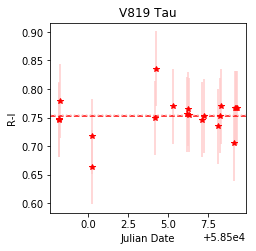

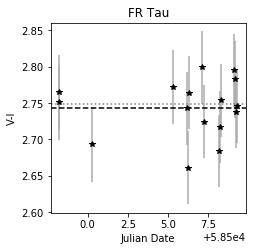

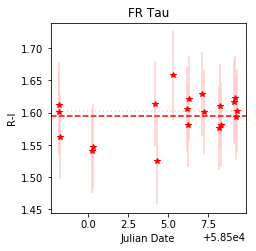

In [45]:

for ind in range(0,len(all_targ_data[:,'V'])):

    target = names_of_targs[ind]
    v_data = all_targ_data[target,'V'][0]
    #v_norm = v_data/np.nanmedian(v_data)
    v_norm = v_data
    v_time = all_targ_data[target,'V'][1]
    v_nerr = v_norm*(all_targ_data_err[target,'V']/np.nanmedian(all_targ_data[target,'V'][0]))
    
    i_data = all_targ_data[target,'I'][0]
    #i_norm = i_data/np.nanmedian(i_data)
    i_norm = i_data
    i_time = all_targ_data[target,'I'][1]
    i_nerr = i_norm*(all_targ_data_err[target,'I']/np.nanmedian(all_targ_data[target,'I'][0]))
    
    r_data = all_targ_data[target,'R'][0]
    #r_norm = r_data/np.nanmedian(r_data)
    r_norm = r_data
    r_time = all_targ_data[target,'R'][1]
    r_nerr = r_norm*(all_targ_data_err[target,'R']/np.nanmedian(all_targ_data[target,'R'][0]))
    
    VI_color = []
    RI_color = []
    VI_time = []
    RI_time = []
    VI_err = []
    RI_err = []
        
    for itim in range(0,len(i_time)):
        for vtim in range(0,len(v_time)):
            if np.abs(v_time[vtim] - i_time[itim]) < 0.015:
                #print(v_data[itim]-i_data[itim])
                VI_color.append(v_norm[vtim]-i_norm[itim])
                VI_time.append(i_time[itim])
                VI_err.append(np.sqrt(np.square(v_nerr[vtim])+np.square(i_nerr[itim])))
                
        for rtim in range(0,len(r_time)):
            if np.abs(r_time[rtim] - i_time[itim]) < 0.015:
                RI_color.append(r_norm[rtim]-i_norm[itim]) 
                RI_time.append(i_time[itim])
                RI_err.append(np.sqrt(np.square(r_nerr[rtim])+np.square(i_nerr[itim])))
    VI_mean = np.nanmean(VI_color)
    VI_med = np.nanmedian(VI_color)
    RI_mean = np.nanmean(RI_color)
    RI_med = np.nanmedian(RI_color)
    fig, ax = plt.subplots(figsize=(3.5,3.5)) #making a new plot
    plt.errorbar(VI_time,VI_color,VI_err, fmt='*', color='black', ecolor='#ADABA8')
    plt.axhline(y=VI_mean, color='black',linestyle='--')
    plt.axhline(y=VI_med, color='grey',linestyle=':')
    plt.ylabel('V-I')
    plt.xlabel('Julian Date')
    plt.title(target)
    plt.savefig(direct+'/'+target+'/'+target+year+'_VI.png')
    fig, ax = plt.subplots(figsize=(3.5,3.5)) #making a new plot
    plt.errorbar(RI_time,RI_color,RI_err, fmt='*', color='red', ecolor='#ffcccc')
    plt.axhline(y=RI_mean, color='red',linestyle='--')
    plt.axhline(y=RI_med, color='#ffcccc',linestyle=':')
    plt.ylabel('R-I')
    plt.xlabel('Julian Date')
    plt.title(target)
    plt.savefig(direct+'/'+target+'/'+target+year+'_RI.png')

UX Tau B the period of 0.5603041582904721


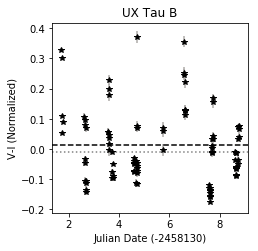

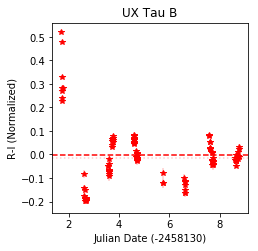

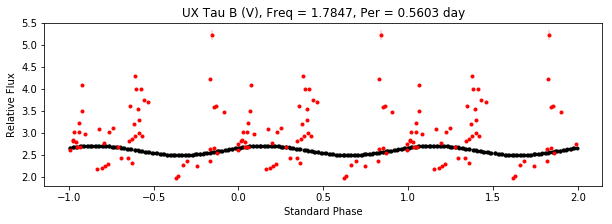

UX Tau B the period of 0.5603041582904721


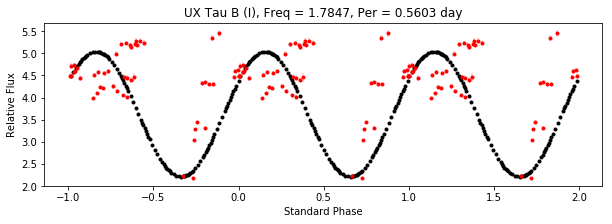

UX Tau B the period of 0.5603041582904721


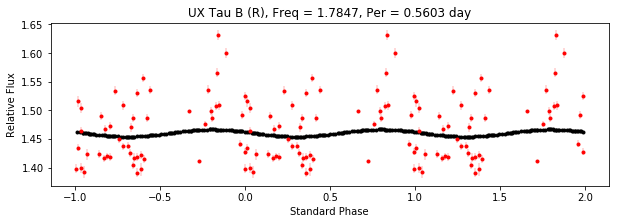

UX Tau B the period of 0.2629744854586897


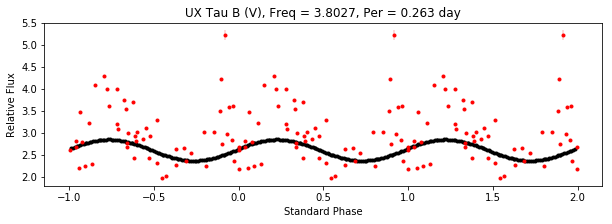

UX Tau B the period of 0.2629744854586897


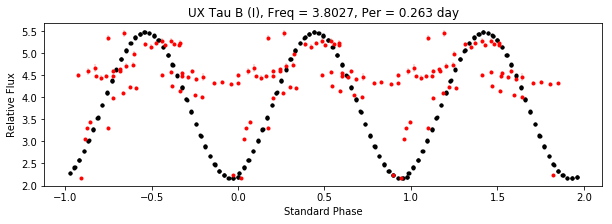

UX Tau B the period of 0.2629744854586897


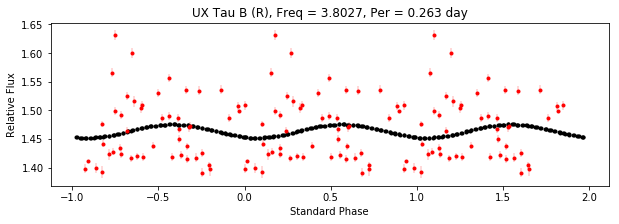

UX Tau B the period of 1.2658182308778414


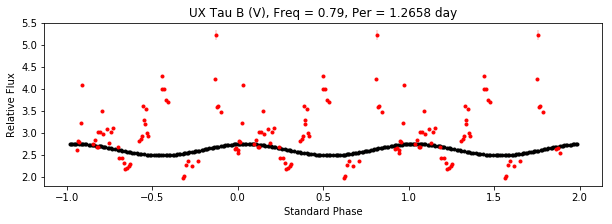

UX Tau B the period of 1.2658182308778414


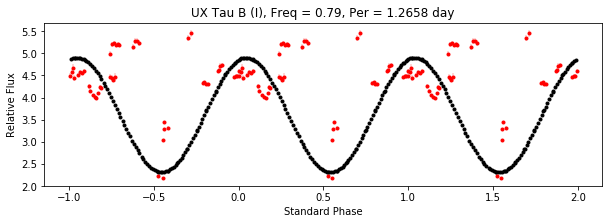

UX Tau B the period of 1.2658182308778414


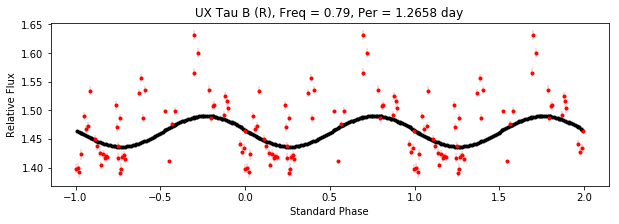

UX Tau B the period of 0.5515214452267677


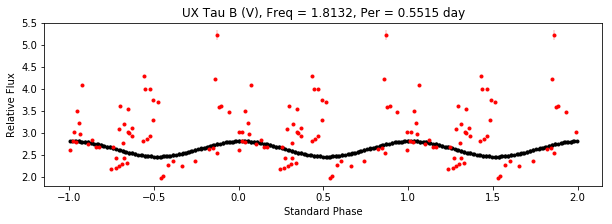

UX Tau B the period of 0.5515214452267677


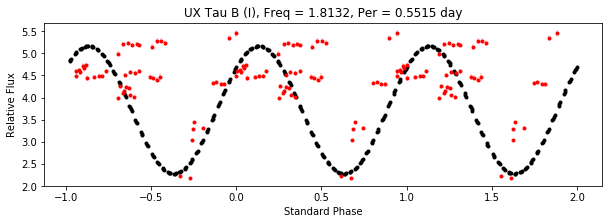

UX Tau B the period of 0.5515214452267677


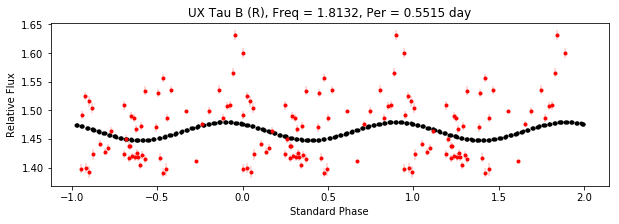

In [24]:

target = 'UX Tau B'
v_data = all_targ_data[target,'V'][0]
v_norm = v_data/np.nanmedian(v_data)
v_time = all_targ_data[target,'V'][1]
v_nerr = v_norm*(all_targ_data_err[target,'V']/np.nanmedian(all_targ_data[target,'V'][0]))

i_data = all_targ_data[target,'I'][0]
i_norm = i_data/np.nanmedian(i_data)
i_time = all_targ_data[target,'I'][1]
i_nerr = i_norm*(all_targ_data_err[target,'I']/np.nanmedian(all_targ_data[target,'I'][0]))

r_data = all_targ_data[target,'R'][0]
r_norm = r_data/np.nanmedian(r_data)
r_time = all_targ_data[target,'R'][1]
r_nerr = r_norm*(all_targ_data_err[target,'R']/np.nanmedian(all_targ_data[target,'R'][0]))

VI_color = []
RI_color = []
VI_time = []
RI_time = []
VI_err = []
RI_err = []

for itim in range(0,len(i_time)):
    for vtim in range(0,len(v_time)):
        if np.abs(v_time[vtim] - i_time[itim]) < 0.015:
            #print(v_data[itim]-i_data[itim])
            VI_color.append(v_norm[vtim]-i_norm[itim])
            VI_time.append(i_time[itim])
            VI_err.append(np.sqrt(np.square(v_nerr[vtim])+np.square(i_nerr[itim])))
                
    for rtim in range(0,len(r_time)):
        if np.abs(r_time[rtim] - i_time[itim]) < 0.015:
            RI_color.append(r_norm[rtim]-i_norm[itim]) 
            RI_time.append(i_time[itim])
            RI_err.append(np.sqrt(np.square(r_nerr[rtim])+np.square(i_nerr[itim])))
VI_mean = np.nanmean(VI_color)
VI_med = np.nanmedian(VI_color)
RI_mean = np.nanmean(RI_color)
RI_med = np.nanmedian(RI_color)
fig, ax = plt.subplots(figsize=(3.5,3.5)) #making a new plot
plt.errorbar(VI_time,VI_color,VI_err, fmt='*', color='black', ecolor='#ADABA8')
plt.axhline(y=VI_mean, color='black',linestyle='--')
plt.axhline(y=VI_med, color='grey',linestyle=':')
plt.ylabel('V-I (Normalized)')
plt.xlabel('Julian Date (-2458130)')
plt.title(target)

fig, ax = plt.subplots(figsize=(3.5,3.5)) #making a new plot
plt.errorbar(RI_time,RI_color,RI_err, fmt='*', color='red', ecolor='#ffcccc')
plt.axhline(y=RI_mean, color='red',linestyle='--')
plt.axhline(y=RI_med, color='#ffcccc',linestyle=':')
plt.ylabel('R-I (Normalized)')
plt.xlabel('Julian Date (-2458130)')
plt.title(target)

filters = ['V','I','R']
min_freq = 0.25
max_freq = 4
        
per_targ = [target] 

for ind in range(0,len(per_targ)): 
    best_per = np.zeros([3,5]) #generating empty best period array
    #making that best period array (contains each band)
    for filt in range(0,len(filters)): #looping through each filter
        time_n = np.array(RI_time) #time for each target
        starflux_n = np.array(RI_color) #star flux with nans
        starfluxerr_n = np.array(RI_err) #error with nans
        starflux = starflux_n[~np.isnan(starflux_n)] #starflux without nans
        starfluxerr = starfluxerr_n[~np.isnan(starfluxerr_n)] #starflux error without nans
        time = time_n[~np.isnan(starflux_n)] #time without nans
     
        f, p = LombScargle(time, starflux, starfluxerr).autopower(minimum_frequency = min_freq, maximum_frequency = max_freq) # default autopower settings
        
        # calculate the period, as inverse of frequency
        per = 1/f
        
        # make an array of the three columns and turn that into a dataframe:
        ls_output_arrays = np.c_[p, f, per]
        ls_output = pd.DataFrame(ls_output_arrays, columns=['Power', 'Frequency', 'Period'])
        
        # now sort the whole dataframe by the “Power” column and save the first 10 rows:
        best_per_df = ls_output.sort_values(by='Power', ascending=False)['Period']
        best_per[filt] = best_per_df[:5].values #saving the 10 strongest periods in this band
    #testing the best period
    for per in range(0,len(best_per[0])-1):
        for filt in range(0,len(filters)):
            test_per = best_per[filt][per] #looping through the V band periods
            print(per_targ[ind]+' the period of '+str(test_per)) #print common V band period
            #then model that period on all three bands
            time_n = all_targ_data[per_targ[ind],filters[filt]][1] #time for each target
            starflux_n = all_targ_data[per_targ[ind],filters[filt]][0] #star flux with nans
            starfluxerr_n = all_targ_data_err[per_targ[ind],filters[filt]] #error with nans
            starflux = starflux_n[~np.isnan(starflux_n)] #starflux without nans
            starfluxerr = starfluxerr_n[~np.isnan(starfluxerr_n)] #starflux error without nans
            time = time_n[~np.isnan(starflux_n)] #time without nans
                
            time_ep = time[2] #time epoch to test phase against CHANGE
            phase_data = ((time-time_ep)/test_per) #phase
            stnd_phase_data = phase_data%1 #normalized phase
                
            test_freq = 1/test_per
                
            time_model = np.linspace(np.min(time), np.max(time), 100) #a model of the time
            mag_model = LombScargle(time, starflux, starfluxerr).model(time_model, test_freq) #model of the best period
            phase_LS = ((time_model-time_ep)/test_per) #phase from the model
            stnd_phase_LS = phase_LS%1 #normalized phase from the model
            
            #making a new plot for periodigram
            fig, ax = plt.subplots(figsize=(10,3)) #setting up a new plot
            plt.plot(stnd_phase_LS, mag_model, 'k.') #plot the model normal phase
            plt.plot(stnd_phase_LS+-np.max(stnd_phase_LS), mag_model, 'k.') #as well as model +phase
            plt.plot(stnd_phase_LS+np.max(stnd_phase_LS), mag_model, 'k.') #and model -phase
                
            plt.errorbar(stnd_phase_data + -np.max(stnd_phase_data), starflux, starfluxerr, fmt='.', color='red', ecolor='#ffcccc') #-phase data
            plt.errorbar(stnd_phase_data + 0, starflux, starfluxerr, fmt='.', color='red', ecolor='#ffcccc') #normal phase data
            plt.errorbar(stnd_phase_data + np.max(stnd_phase_data), starflux, starfluxerr, fmt='.', color='red', ecolor='#ffcccc') #+phase data
                  
            plt.xlabel('Standard Phase')
            plt.ylabel('Relative Flux')
            plt.title(per_targ[ind]+' ('+filters[filt]+')'+', '+'Freq = '+str(round(test_freq,4))+', Per = '+str(round(test_per,4))+' day')
            plt.show()

In [25]:
starflux

array([1.498817, 1.508577, 1.397851, 1.536241, 1.565824, 1.530299,
       1.423401, 1.44181 , 1.411897, 1.438194, 1.39953 , 1.487181,
       1.631462, 1.557014, 1.415927, 1.427528, 1.47607 , 1.48649 ,
       1.391978, 1.50691 , 1.60035 , 1.486773, 1.419557, 1.434514,
       1.498253, 1.418608, 1.42341 , 1.508479, 1.534727, 1.418124,
       1.464502, 1.421769, 1.450393, 1.492508, 1.470726, 1.490044,
       1.414855, 1.436778, 1.524944, 1.4173  , 1.467147, 1.425051,
       1.515432, 1.391137, 1.472874, 1.403922, 1.504294, 1.396603,
       1.53462 ])

## COMPARE AMPLITUDES

In [11]:
time

array([ 2.15557,  2.23921,  2.31461,  0.18849,  0.27089,  5.10193,
        3.12678,  5.19393,  5.23846,  5.29691,  4.23402,  4.31202,
        4.14833,  1.28518,  3.23581, -5.79929, -5.79227, -5.75664,
       -3.76789, -3.72513])

V410 X-ray 1 the period of 1.1439281697946622


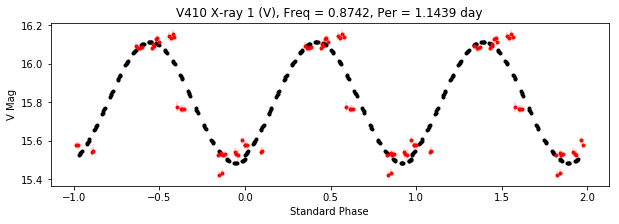

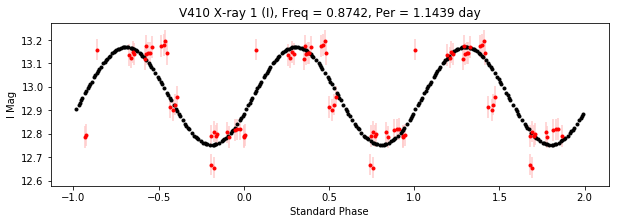

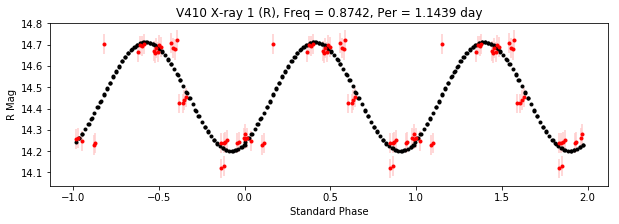

V410 X-ray 1 the period of 1.095059893031013


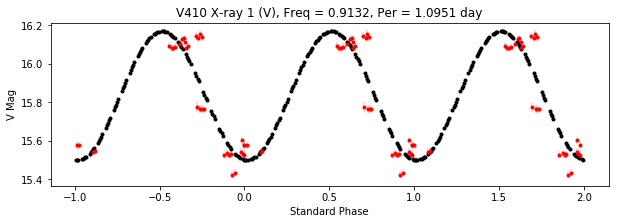

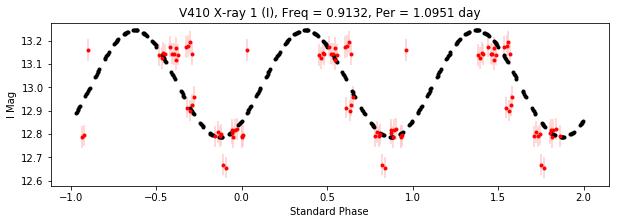

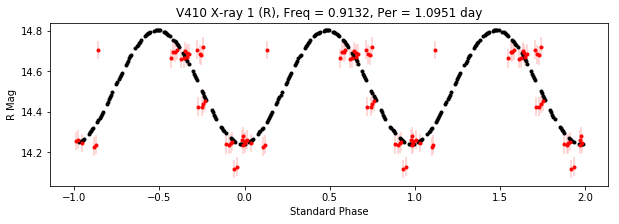

V410 X-ray 1 the period of 0.8716421158590489


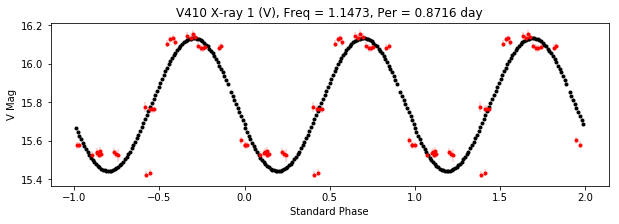

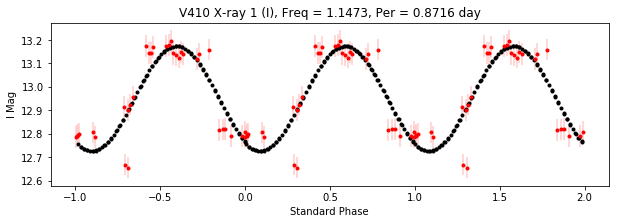

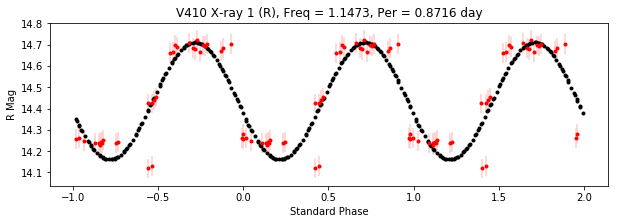

V410 X-ray 1 the period of 0.9023246645368611


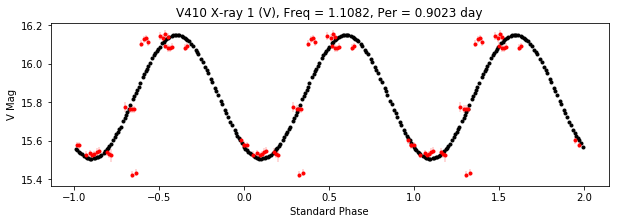

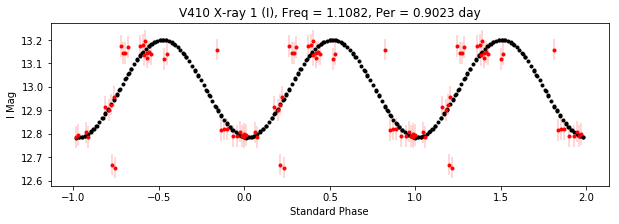

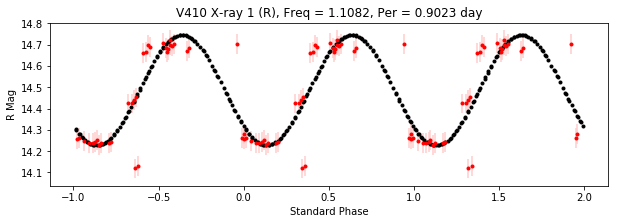

V410 X-ray 1 the period of 0.529527933169294


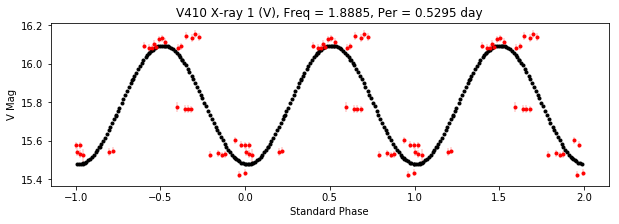

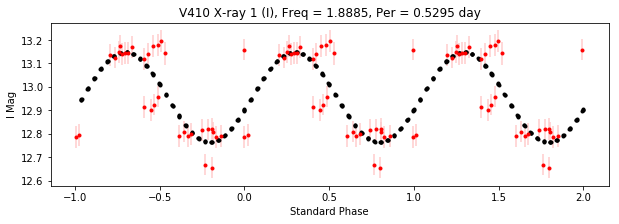

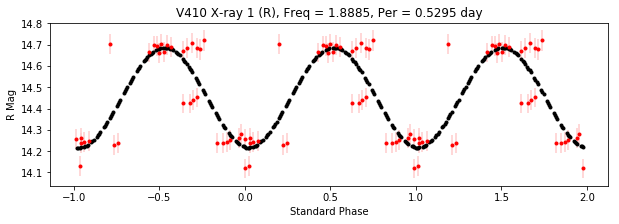

V410 X-ray 3 the period of 0.4174282345743172


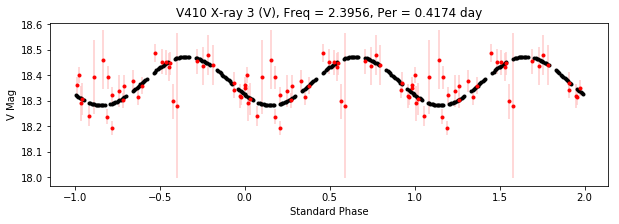

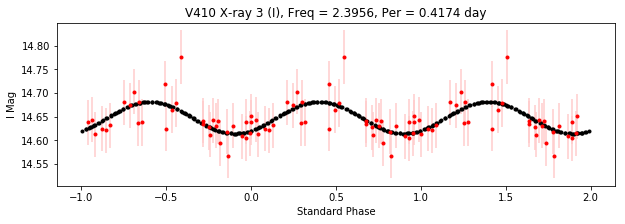

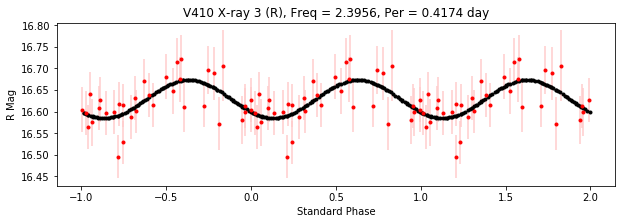

DD Tau A+B the period of 1.1439281697946622


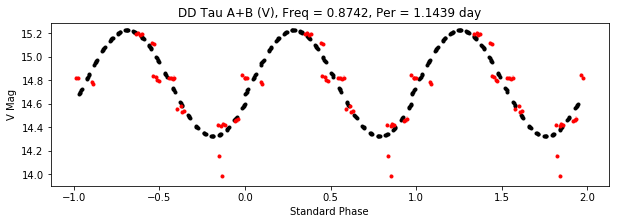

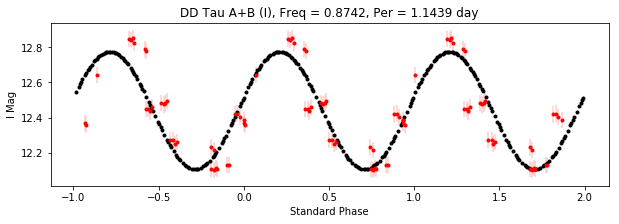

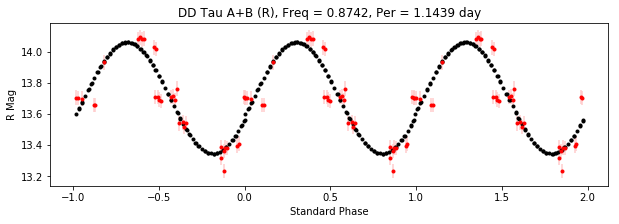

DD Tau A+B the period of 0.8716421158590489


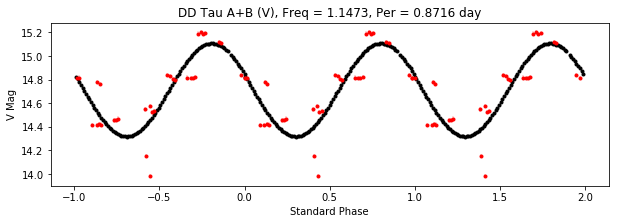

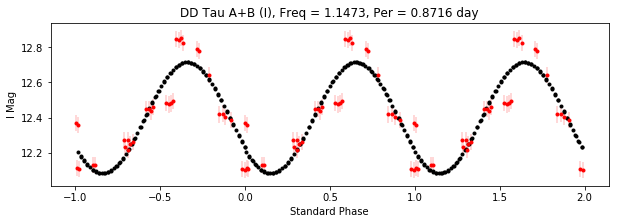

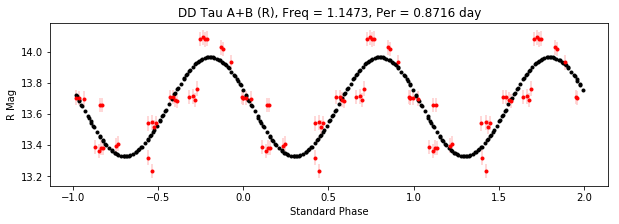

DD Tau A+B the period of 1.095059893031013


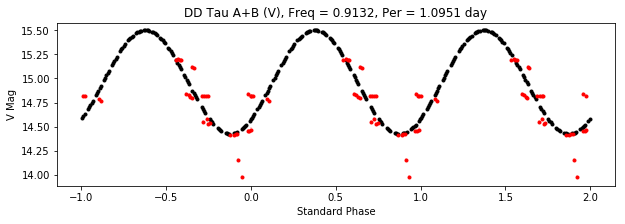

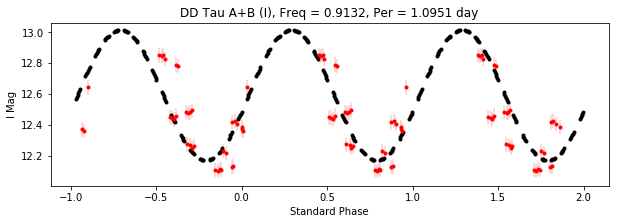

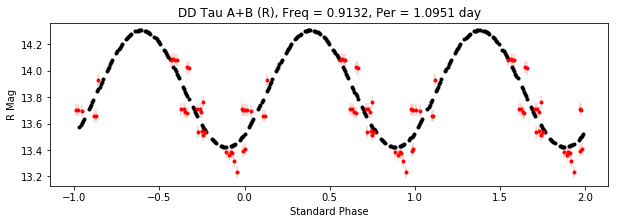

DD Tau A+B the period of 0.9023246645368611


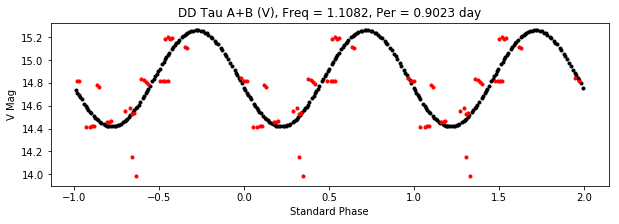

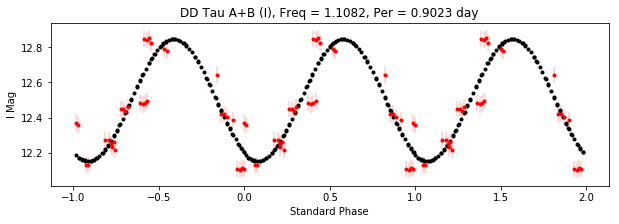

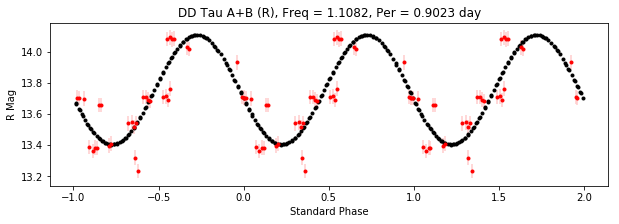

CZ Tau A+B the period of 0.8716421158590489


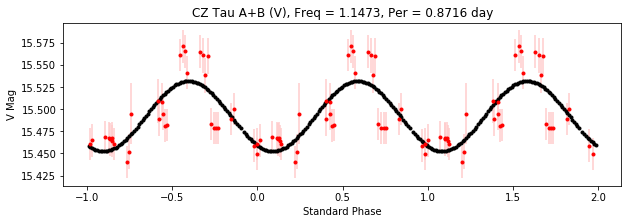

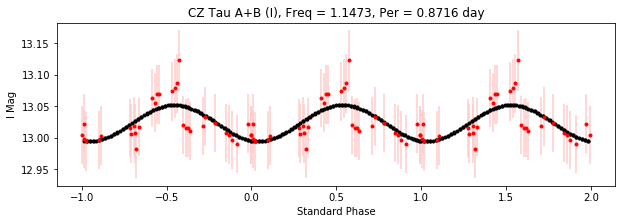

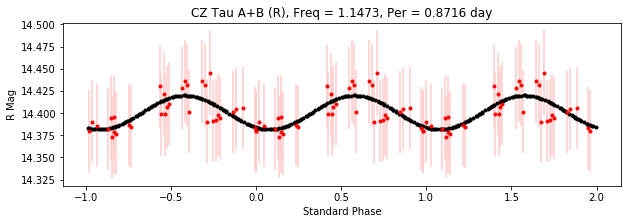

CZ Tau A+B the period of 0.5406974291482596


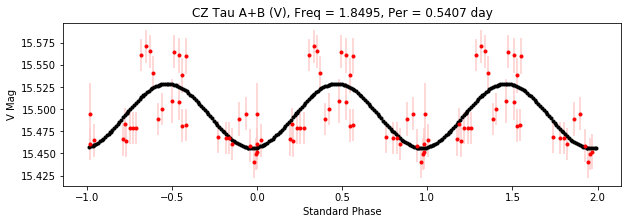

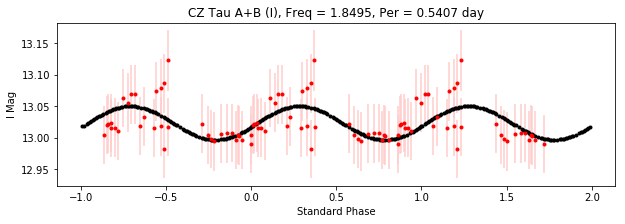

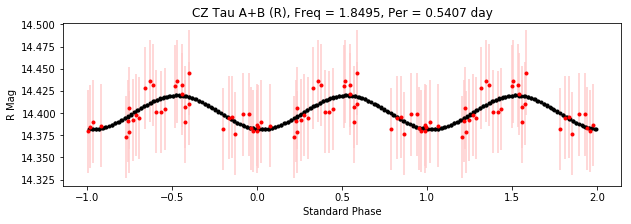

CoKu Tau 1 the period of 0.9023246645368611


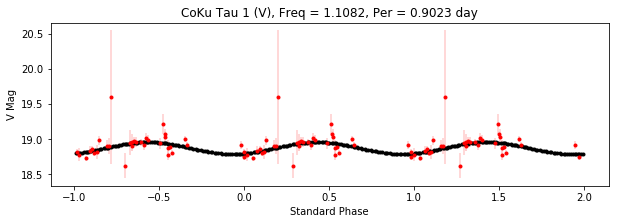

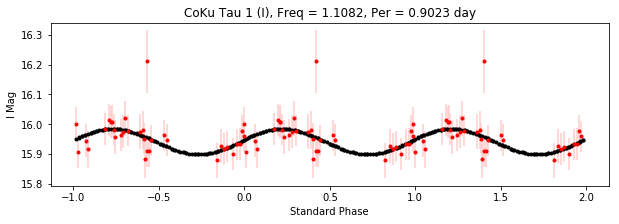

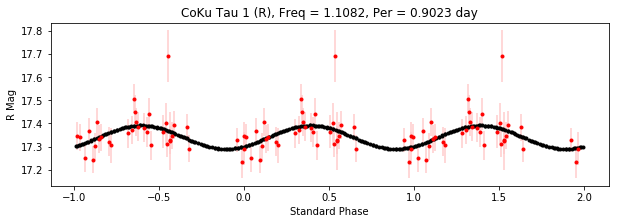

CoKu Tau 1 the period of 0.8716421158590489


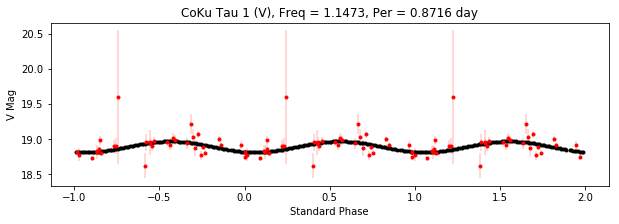

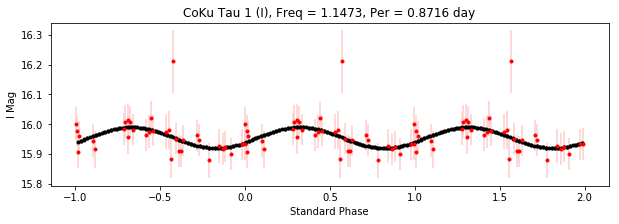

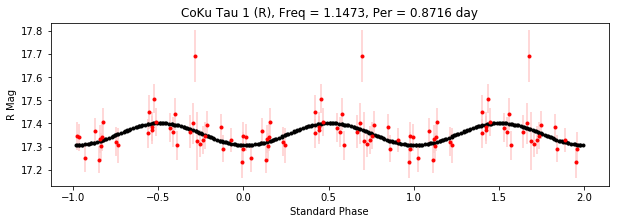

FQ Tau A+B the period of 1.1439281697946622


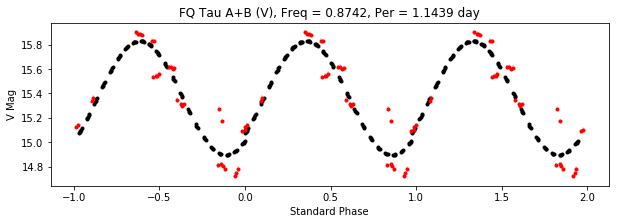

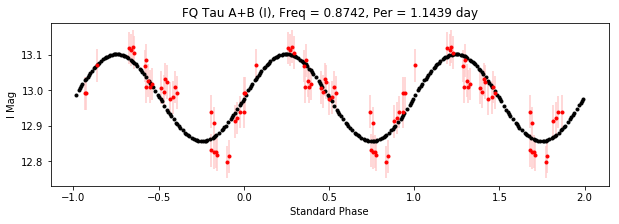

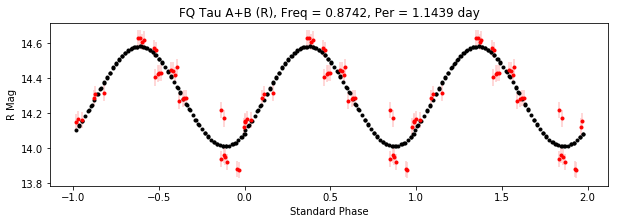

FQ Tau A+B the period of 0.9023246645368611


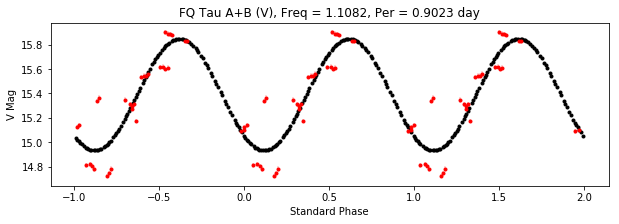

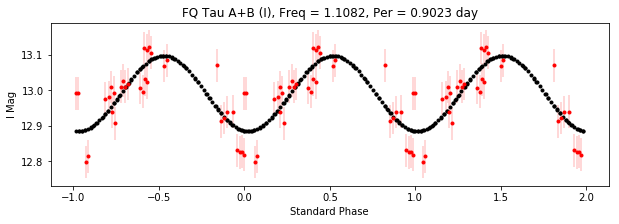

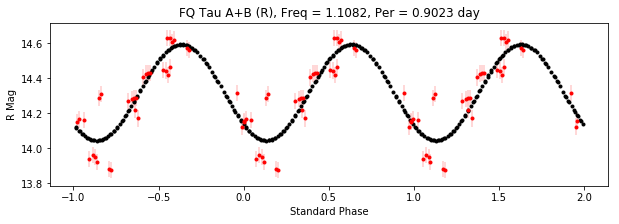

FQ Tau A+B the period of 0.8716421158590489


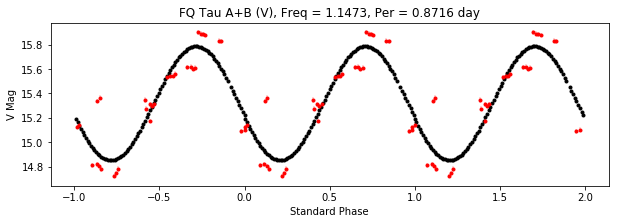

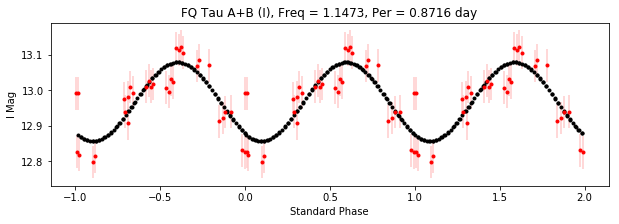

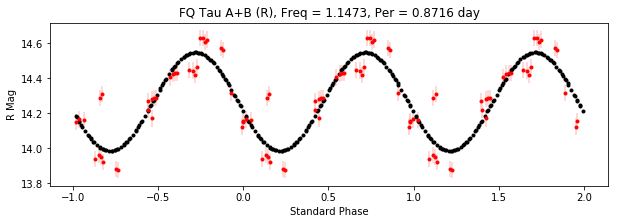

FQ Tau A+B the period of 1.095059893031013


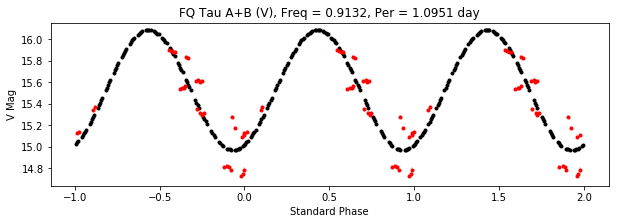

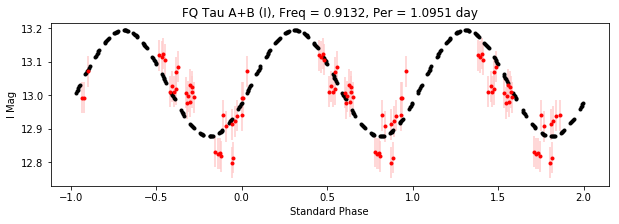

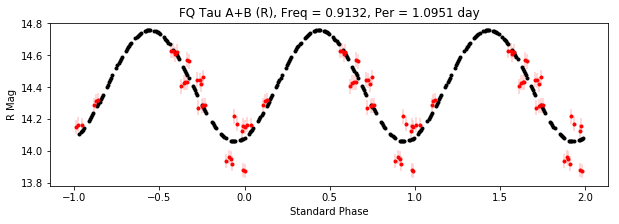

FQ Tau A+B the period of 0.529527933169294


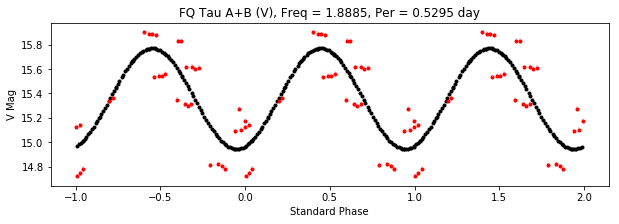

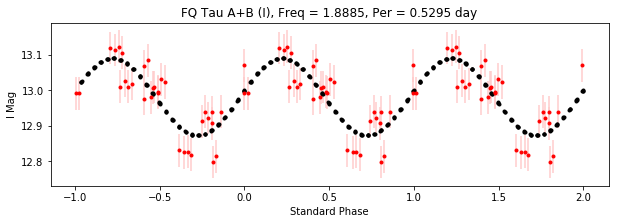

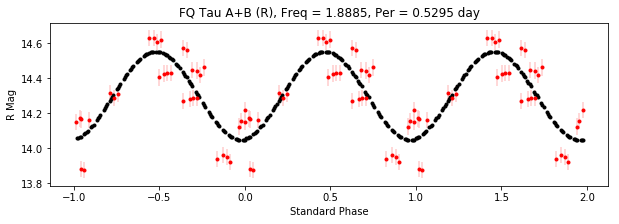

V819 Tau the period of 1.1439281697946622


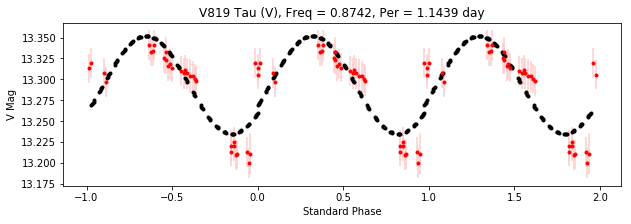

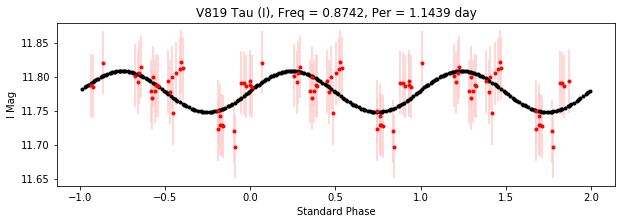

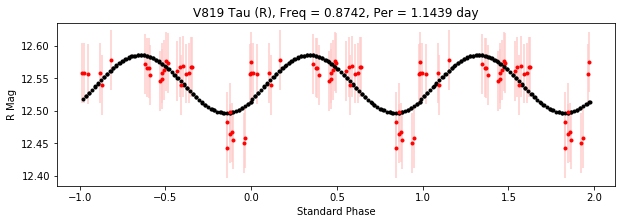

V819 Tau the period of 0.5523482817772696


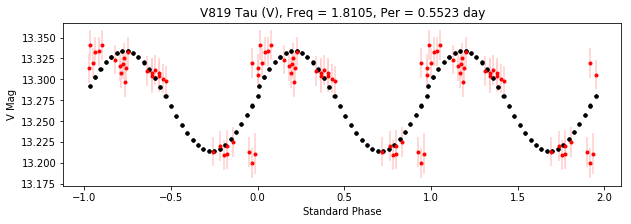

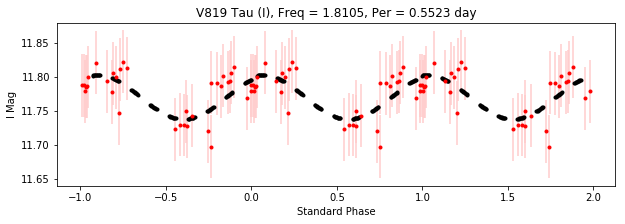

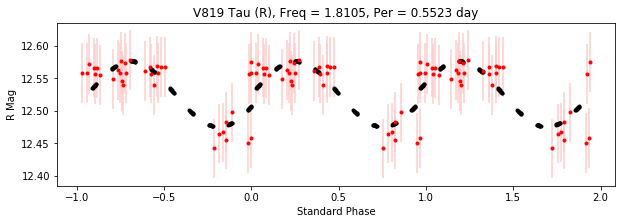

V819 Tau the period of 0.5406974291482596


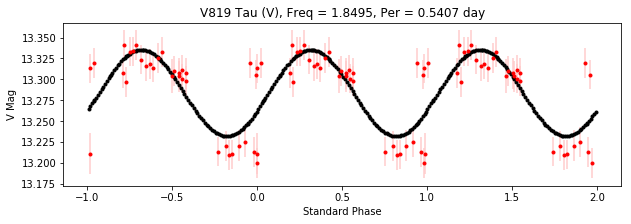

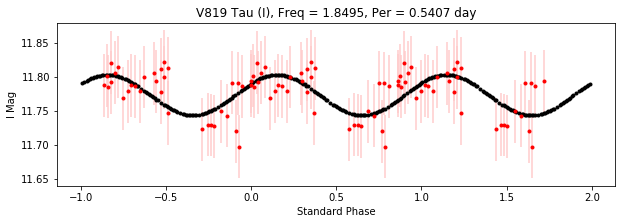

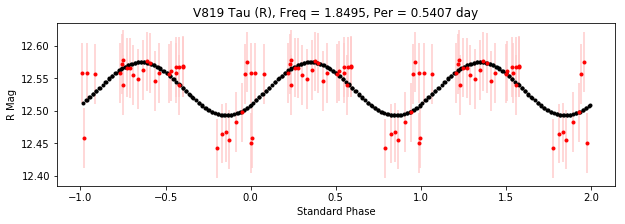

In [8]:
# table_dir = glob.glob(direct+'/*test_*.csv')
# table = pd.read_csv(table_dir[0])
# per_targ = []

filters = ['V','I','R']
min_freq = 0.25
max_freq = 4
top_per_num = 10
        
#per_targ = table['Name'] #every single target
per_targ = names_of_targs
for ind in range(0,len(per_targ)): 
    best_per = np.zeros([3,top_per_num]) #generating empty best period array
    #making that best period array (contains each band)
    for filt in range(0,len(filters)): #looping through each filter
        time_n = all_targ_data[per_targ[ind],filters[filt]][1] #time for each target
        starflux_n = all_targ_data[per_targ[ind],filters[filt]][0] #star flux with nans
        starfluxerr_n = all_targ_data_err[per_targ[ind],filters[filt]] #error with nans
        starflux = starflux_n[~np.isnan(starflux_n)] #starflux without nans
        starfluxerr = starfluxerr_n[~np.isnan(starfluxerr_n)] #starflux error without nans
        time = time_n[~np.isnan(starflux_n)] #time without nans
     
        f, p = LombScargle(time, starflux, starfluxerr).autopower(minimum_frequency = min_freq, maximum_frequency = max_freq) # default autopower settings
        
        # calculate the period, as inverse of frequency
        per = 1/f
        
        # make an array of the three columns and turn that into a dataframe:
        ls_output_arrays = np.c_[p, f, per]
        ls_output = pd.DataFrame(ls_output_arrays, columns=['Power', 'Frequency', 'Period'])
        
        # now sort the whole dataframe by the “Power” column and save the first 10 rows:
        best_per_df = ls_output.sort_values(by='Power', ascending=False)['Period']
        best_per[filt] = best_per_df[:top_per_num].values #saving the strongest periods in this band with user inputted num
    #testing the best period
    for per in range(0,len(best_per[0])-1):
        test_per = best_per[0][per] #looping through the V band periods
        per_diff = np.abs(best_per-test_per) #making a matrix of the differences
        #if there exists 3 places w/ period difference <7 min (assumed 3 places are the 3 bands)
        if len(per_diff[np.where(per_diff<0.005)])==3: 
            print(per_targ[ind]+' the period of '+str(test_per)) #print common V band period
            #then model that period on all three bands
            for filt in range(0,len(filters)):
                time_n = all_targ_data[per_targ[ind],filters[filt]][1] #time for each target
                starflux_n = all_targ_data[per_targ[ind],filters[filt]][0] #star flux with nans
                starfluxerr_n = all_targ_data_err[per_targ[ind],filters[filt]] #error with nans
                starflux = starflux_n[~np.isnan(starflux_n)] #starflux without nans
                starfluxerr = starfluxerr_n[~np.isnan(starfluxerr_n)] #starflux error without nans
                time = time_n[~np.isnan(starflux_n)] #time without nans
                
                time_ep = time[2] #time epoch to test phase against CHANGE
                phase_data = ((time-time_ep)/test_per) #phase
                stnd_phase_data = phase_data%1 #normalized phase
                
                test_freq = 1/test_per
                
                time_model = np.linspace(np.min(time), np.max(time), 100) #a model of the time
                mag_model = LombScargle(time, starflux, starfluxerr).model(time_model, test_freq) #model of the best period
                phase_LS = ((time_model-time_ep)/test_per) #phase from the model
                stnd_phase_LS = phase_LS%1 #normalized phase from the model
            
                #making a new plot for periodigram
                fig, ax = plt.subplots(figsize=(10,3)) #setting up a new plot
                plt.plot(stnd_phase_LS, mag_model, 'k.') #plot the model normal phasecolor='red', ecolor='#ffcccc'
                plt.plot(stnd_phase_LS+-np.max(stnd_phase_LS), mag_model, 'k.') #as well as model +phase
                plt.plot(stnd_phase_LS+np.max(stnd_phase_LS), mag_model, 'k.') #and model -phase
                
                plt.errorbar(stnd_phase_data + -np.max(stnd_phase_data), starflux, starfluxerr, fmt='.', color='red', ecolor='#ffcccc') #-phase data
                plt.errorbar(stnd_phase_data + 0, starflux, starfluxerr, fmt='.', color='red', ecolor='#ffcccc') #normal phase data
                plt.errorbar(stnd_phase_data + np.max(stnd_phase_data), starflux, starfluxerr, fmt='.', color='red', ecolor='#ffcccc') #+phase data
               
                plt.xlabel('Standard Phase')
                plt.ylabel(filters[filt]+' Mag')
                plt.title(per_targ[ind]+' ('+filters[filt]+')'+', '+'Freq = '+str(round(test_freq,4))+', Per = '+str(round(test_per,4))+' day')
                plt.show()

In [95]:
table

Name Spectral Type  Estimated Mass (solar mass)  3.6-8Mag  \
0        KPNO 10            M5                        0.117      1.96   
1     DD Tau A+B          M3.5                        0.245      2.08   
2     CZ Tau A+B          M4.2                        0.177      3.49   
3       V892 Tau            A0                        5.500       NaN   
4   V410 X-ray 6          M5.5                        0.088      0.54   
5     CoKu Tau/1            M0                        0.558      4.34   
6   V410 X-ray 3         M6.25                        0.058      0.17   
7       V819 Tau            K8                        0.637      0.14   
8         FR Tau         M5.25                        0.101      2.15   
9   V410 X-ray 1          M3.7                        0.222      1.89   
10    FQ Tau A+B          M3.5                        0.245      1.31   
11        XZ Tau            M2                        0.359       NaN   
12        HL Tau            K7                        0.649       NaN   
13       LkHa267          M1.5                        0.398      1.47   
14      UX Tau A            K5                        0.820      0.73   
15      UX Tau B            M2                        0.359      0.09   
16      LkHa 358            K8                        0.637      2.02   
17         HH 30            M0                        0.558       NaN   

       Type of Disk Variability  Rotational Period (days) Quality  
0              Full    Variable                    1.5507     Bad  
1              Full    Periodic                    0.8784      Ok  
2              Full    Variable                    1.2355      Ok  
3              Full    Variable                       NaN     NaN  
4      Transitional    Variable                       NaN     NaN  
5              Full    Periodic                    0.3179      Ok  
6   Debris/Ev Trans    Periodic                    3.1664      Ok  
7   Debris/Ev Trans    Variable                    0.5466     Bad  
8              Full    Variable                       NaN     NaN  
9              Full    Variable                    0.8784     Bad  
10             Full    Periodic                    1.1426    Good  
11             Full    Variable                    1.1109      Ok  
12             Full    Variable                       NaN     NaN  
13             Full    Periodic                    2.5553    Good  
14     Transitional    Variable                       NaN     NaN  
15     Transitional    Variable                       NaN     NaN  
16             Full    Periodic                    0.8878    Good  
17             Full    Variable                       NaN     NaN

Text(0,0.5,u'Counts')

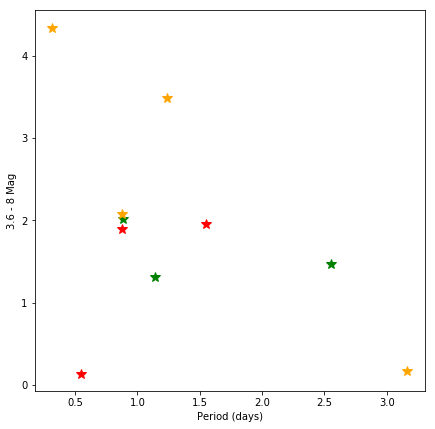

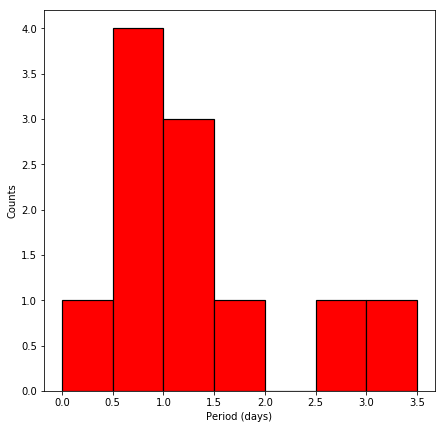

In [14]:
table_dir = glob.glob(direct+'/Star*test_*.csv')
table = pd.read_csv(table_dir[0])
peri = []
b_dust = []
o_dust = []
g_dust = []
b_peri = []
o_peri = []
g_peri = []

for ind in range(0,len(table['Name'])):
    if np.isnan(table['Rotational Period (days)'][ind])==False:
        target = table['Name'][ind]
        peri.append(table['Rotational Period (days)'][ind])
        if table['Quality'][ind]=='Bad':
            b_peri.append(table['Rotational Period (days)'][ind])
            b_dust.append(table['3.6-8Mag'][ind])
        elif table['Quality'][ind]=='Good':
            g_peri.append(table['Rotational Period (days)'][ind])
            g_dust.append(table['3.6-8Mag'][ind])
        else:
            o_peri.append(table['Rotational Period (days)'][ind])
            o_dust.append(table['3.6-8Mag'][ind])

fig, ax = plt.subplots(figsize=(7,7)) #making a new plot
plt.plot(g_peri,g_dust,'g*',markersize=10)
plt.plot(b_peri,b_dust,'r*',markersize=10)
plt.plot(o_peri,o_dust,'*',color = 'orange',markersize=10)

plt.xlabel('Period (days)')
plt.ylabel('3.6 - 8 Mag')

n_bins = [0,0.5,1,1.5,2,2.5,3,3.5]
fig, ax = plt.subplots(figsize=(7,7))
plt.hist(peri,bins=n_bins,facecolor='r',edgecolor='black', linewidth=1.2)
plt.xlabel('Period (days)')
plt.ylabel('Counts')

(5.72, 5.78)

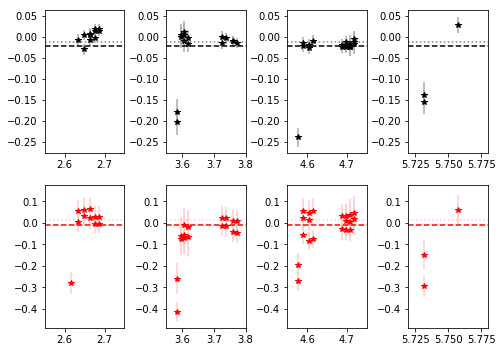

In [27]:
target = 'HL Tau'
v_data = all_targ_data[target,'V'][0]
v_norm = v_data/np.nanmedian(v_data)
v_time = all_targ_data[target,'V'][1]
v_nerr = v_norm*(all_targ_data_err[target,'V']/np.nanmedian(all_targ_data[target,'V'][0]))

i_data = all_targ_data[target,'I'][0]
i_norm = i_data/np.nanmedian(i_data)
i_time = all_targ_data[target,'I'][1]
i_nerr = i_norm*(all_targ_data_err[target,'I']/np.nanmedian(all_targ_data[target,'I'][0]))

r_data = all_targ_data[target,'R'][0]
r_norm = r_data/np.nanmedian(r_data)
r_time = all_targ_data[target,'R'][1]
r_nerr = r_norm*(all_targ_data_err[target,'R']/np.nanmedian(all_targ_data[target,'R'][0]))

VI_color = []
RI_color = []
VI_time = []
RI_time = []
VI_err = []
RI_err = []
    
for itim in range(0,len(i_time)):
    for vtim in range(0,len(v_time)):
        if np.abs(v_time[vtim] - i_time[itim]) < 0.015:
            #print(v_data[itim]-i_data[itim])
            VI_color.append(v_norm[vtim]-i_norm[itim])
            VI_time.append(i_time[itim])
            VI_err.append(np.sqrt(np.square(v_nerr[vtim])+np.square(i_nerr[itim])))
                
    for rtim in range(0,len(r_time)):
        if np.abs(r_time[rtim] - i_time[itim]) < 0.015:
            RI_color.append(r_norm[rtim]-i_norm[itim]) 
            RI_time.append(i_time[itim])
            RI_err.append(np.sqrt(np.square(r_nerr[rtim])+np.square(i_nerr[itim])))
VI_mean = np.nanmean(VI_color)
VI_med = np.nanmedian(VI_color)
RI_mean = np.nanmean(RI_color)
RI_med = np.nanmedian(RI_color)

xmin = 2.55
xmax = 2.75
fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize=(7,5))
ax[0,0].errorbar(VI_time,VI_color,VI_err, fmt='*', color='black', ecolor='#ADABA8')
ax[0,0].axhline(y=VI_mean, color='black',linestyle='--')
ax[0,0].axhline(y=VI_med, color='grey',linestyle=':')
ax[0,0].set_xlim([xmin,xmax]) 
plt.tight_layout()

ax[1,0].errorbar(RI_time,RI_color,RI_err, fmt='*', color='red', ecolor='#ffcccc')
ax[1,0].axhline(y=RI_mean, color='red',linestyle='--')
ax[1,0].axhline(y=RI_med, color='#ffcccc',linestyle=':')
ax[1,0].set_xlim([xmin,xmax])


xmin = 3.55
xmax = 3.8
ax[0,1].errorbar(VI_time,VI_color,VI_err, fmt='*', color='black', ecolor='#ADABA8')
ax[0,1].axhline(y=VI_mean, color='black',linestyle='--')
ax[0,1].axhline(y=VI_med, color='grey',linestyle=':')
ax[0,1].set_xlim([xmin,xmax]) 

ax[1,1].errorbar(RI_time,RI_color,RI_err, fmt='*', color='red', ecolor='#ffcccc')
ax[1,1].axhline(y=RI_mean, color='red',linestyle='--')
ax[1,1].axhline(y=RI_med, color='#ffcccc',linestyle=':')
ax[1,1].set_xlim([xmin,xmax])

xmin = 4.55
xmax = 4.75
ax[0,2].errorbar(VI_time,VI_color,VI_err, fmt='*', color='black', ecolor='#ADABA8')
ax[0,2].axhline(y=VI_mean, color='black',linestyle='--')
ax[0,2].axhline(y=VI_med, color='grey',linestyle=':')
ax[0,2].set_xlim([xmin,xmax]) 

ax[1,2].errorbar(RI_time,RI_color,RI_err, fmt='*', color='red', ecolor='#ffcccc')
ax[1,2].axhline(y=RI_mean, color='red',linestyle='--')
ax[1,2].axhline(y=RI_med, color='#ffcccc',linestyle=':')
ax[1,2].set_xlim([xmin,xmax]) 

xmin = 5.72
xmax = 5.78
ax[0,3].errorbar(VI_time,VI_color,VI_err, fmt='*', color='black', ecolor='#ADABA8')
ax[0,3].axhline(y=VI_mean, color='black',linestyle='--')
ax[0,3].axhline(y=VI_med, color='grey',linestyle=':')
ax[0,3].set_xlim([xmin,xmax]) 

ax[1,3].errorbar(RI_time,RI_color,RI_err, fmt='*', color='red', ecolor='#ffcccc')
ax[1,3].axhline(y=RI_mean, color='red',linestyle='--')
ax[1,3].axhline(y=RI_med, color='#ffcccc',linestyle=':')
ax[1,3].set_xlim([xmin,xmax]) 




FR Tau the period of 1.32074771748


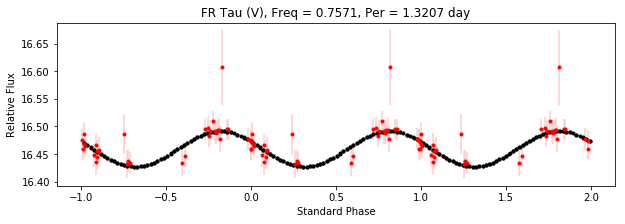

FR Tau the period of 1.47146278309


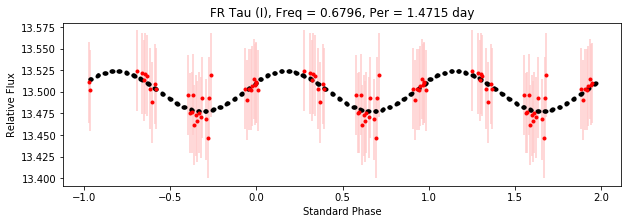

FR Tau the period of 1.18506717231


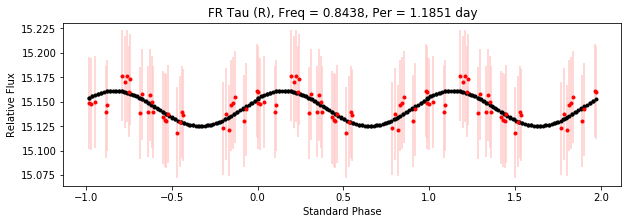

FR Tau the period of 4.0


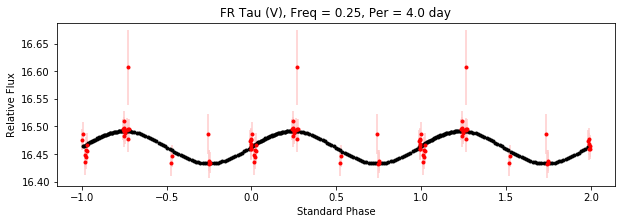

FR Tau the period of 0.598454472192


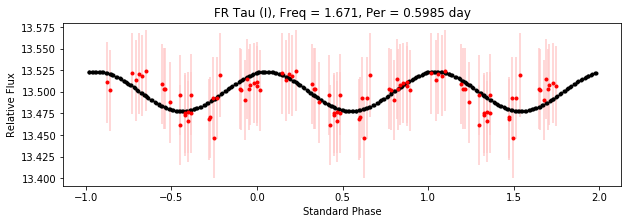

FR Tau the period of 1.14047868763


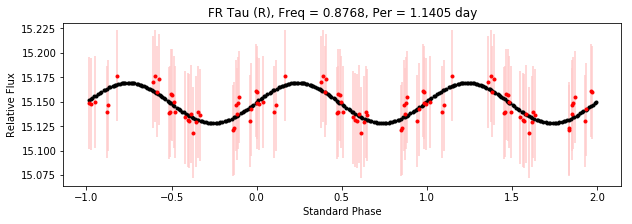

FR Tau the period of 1.25603183003


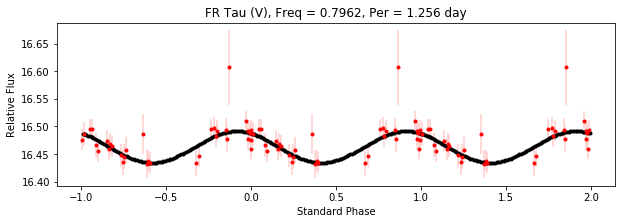

FR Tau the period of 0.586848701402


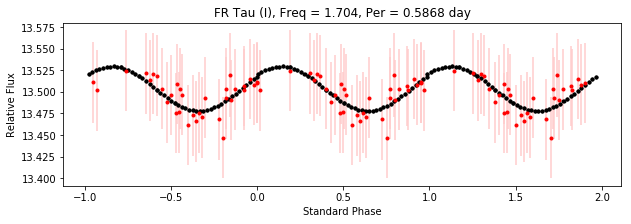

FR Tau the period of 1.23328400035


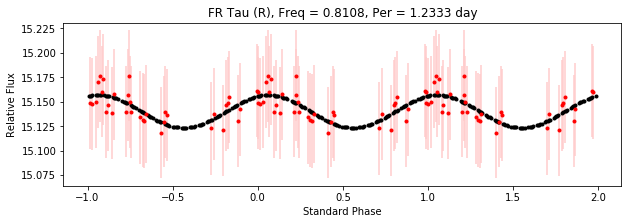

FR Tau the period of 0.816138357892


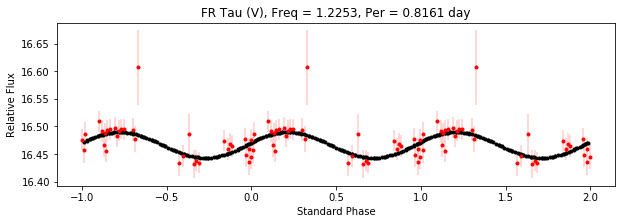

FR Tau the period of 2.86420103642


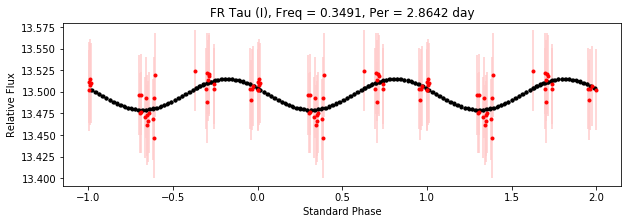

FR Tau the period of 1.09912384475


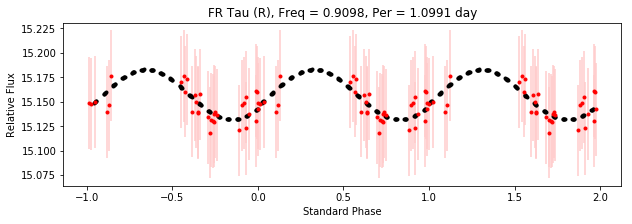

FQ Tau A+B the period of 1.14392816979


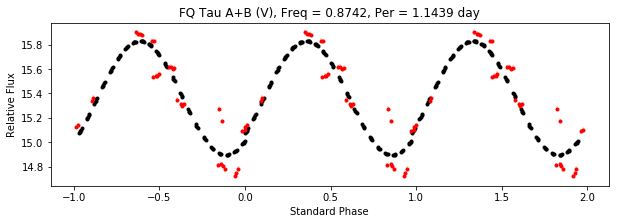

FQ Tau A+B the period of 1.13911971466


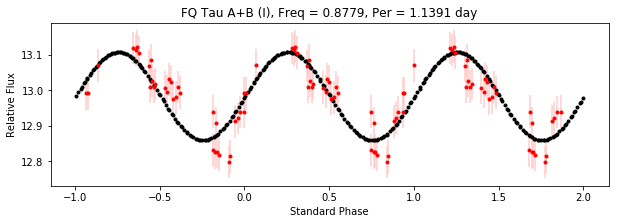

FQ Tau A+B the period of 1.14047868763


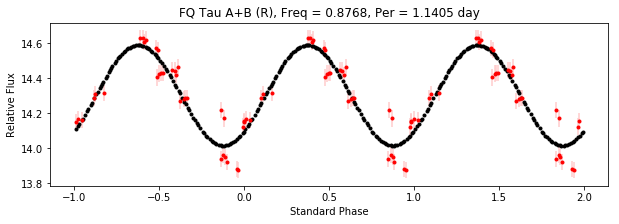

FQ Tau A+B the period of 0.902324664537


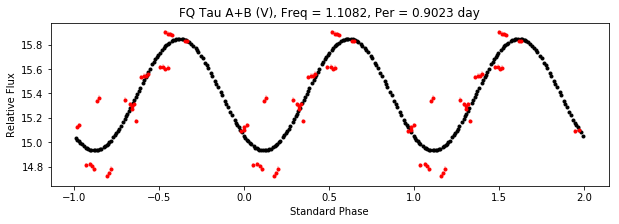

FQ Tau A+B the period of 1.18367706164


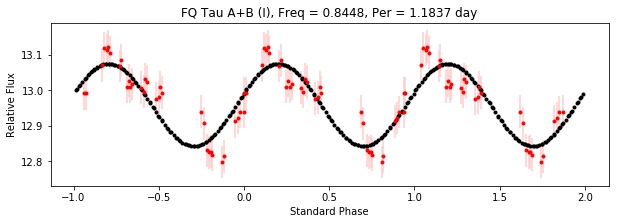

FQ Tau A+B the period of 1.18506717231


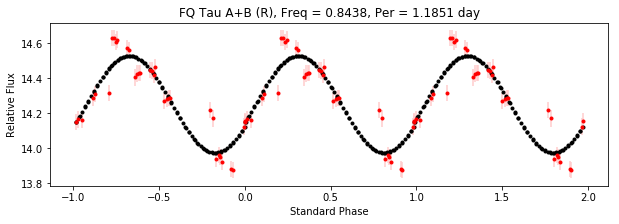

FQ Tau A+B the period of 0.871642115859


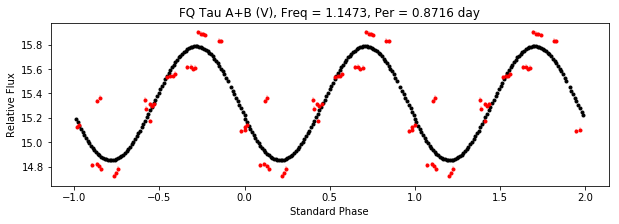

FQ Tau A+B the period of 1.09779523131


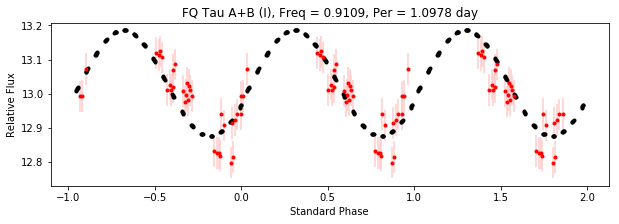

FQ Tau A+B the period of 1.09912384475


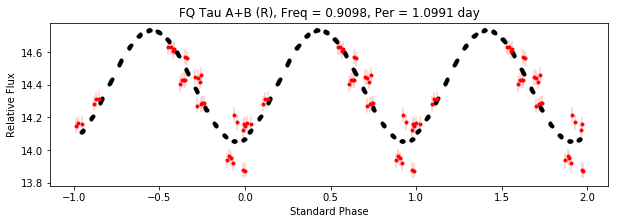

FQ Tau A+B the period of 1.19736178323


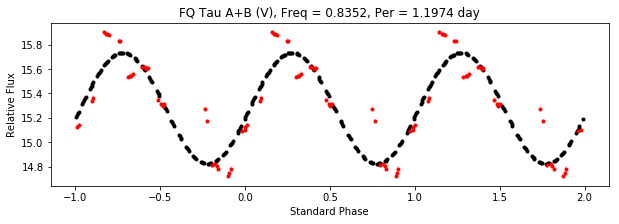

FQ Tau A+B the period of 0.534975095133


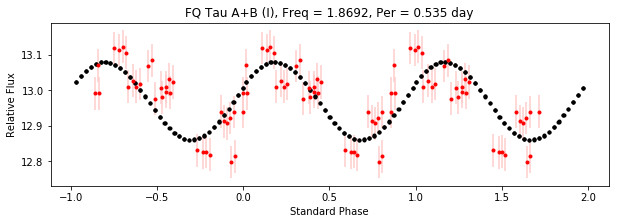

FQ Tau A+B the period of 0.876615465814


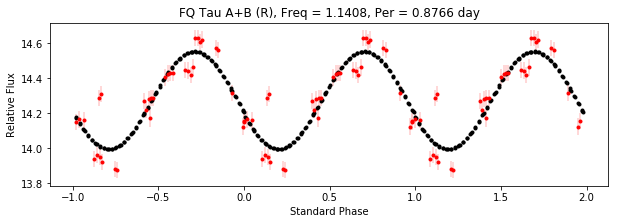

V410 X-ray 6 the period of 1.66361205576


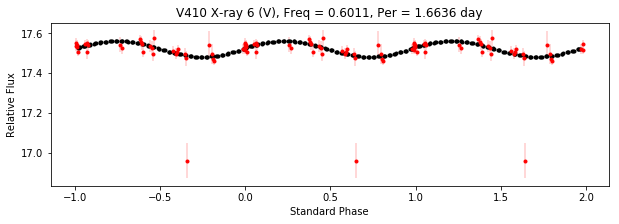

V410 X-ray 6 the period of 1.82677593154


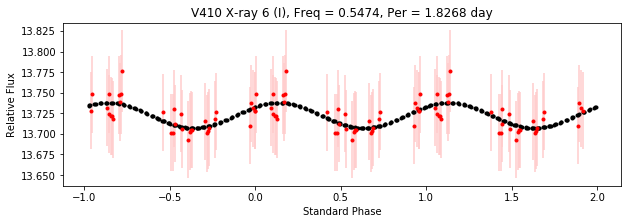

V410 X-ray 6 the period of 2.40990628385


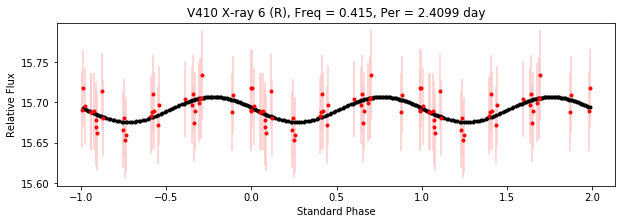

V410 X-ray 6 the period of 0.634363152217


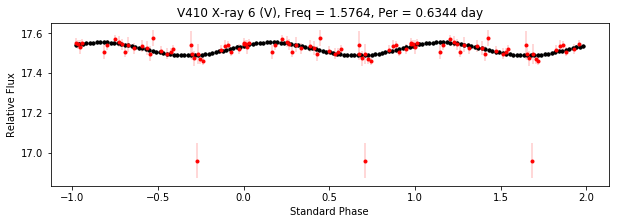

V410 X-ray 6 the period of 2.23077348372


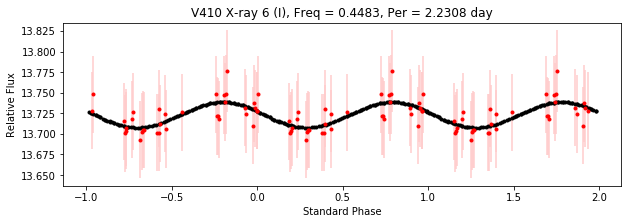

V410 X-ray 6 the period of 2.23241854856


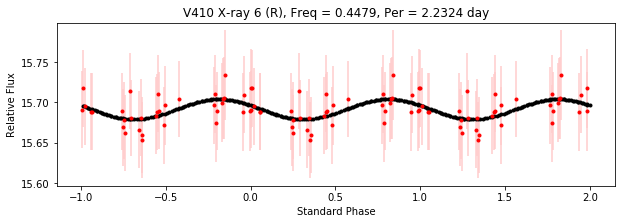

V410 X-ray 6 the period of 0.385999361527


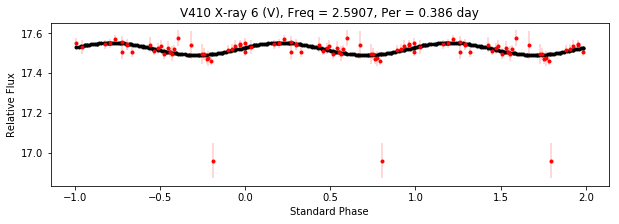

V410 X-ray 6 the period of 1.72277650475


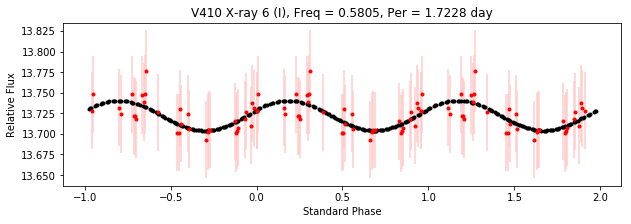

V410 X-ray 6 the period of 1.72441208053


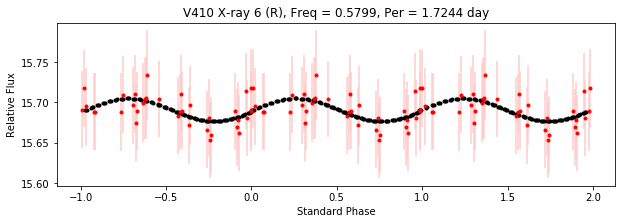

V410 X-ray 6 the period of 0.619043479102


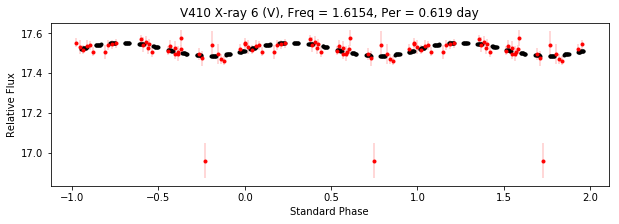

V410 X-ray 6 the period of 1.94413838518


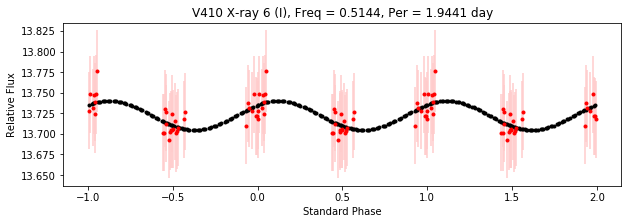

V410 X-ray 6 the period of 0.695570860213


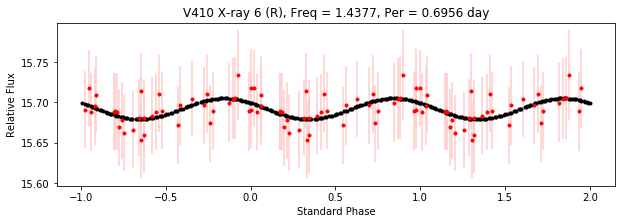

V410 X-ray 3 the period of 0.417428234574


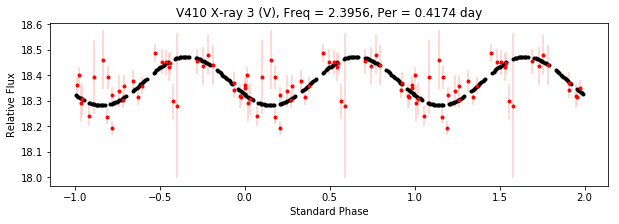

V410 X-ray 3 the period of 0.42284488631


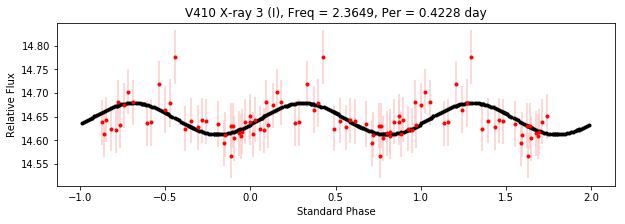

V410 X-ray 3 the period of 0.729029561996


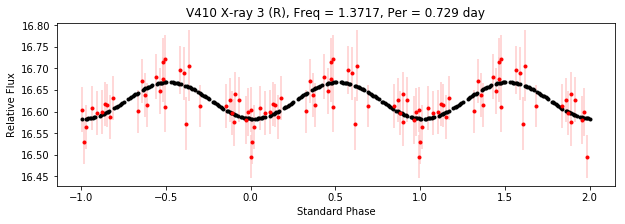

V410 X-ray 3 the period of 0.489112432359


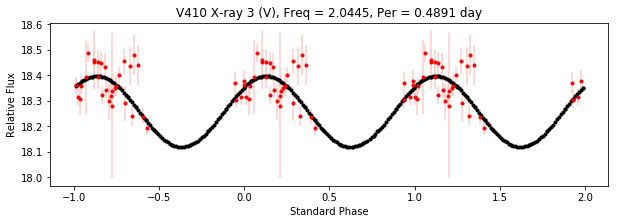

V410 X-ray 3 the period of 4.0


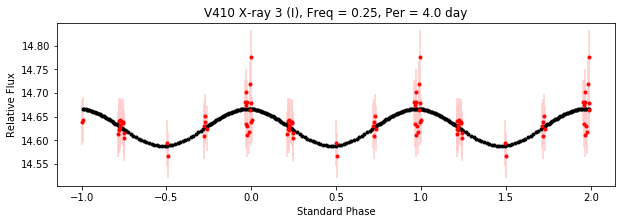

V410 X-ray 3 the period of 0.423475829647


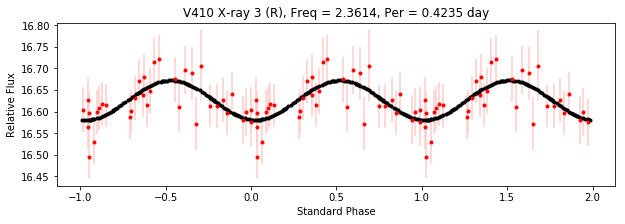

V410 X-ray 3 the period of 0.704057305458


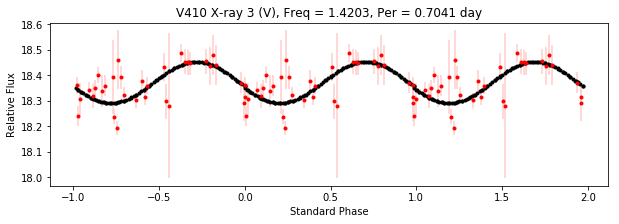

V410 X-ray 3 the period of 0.417017787439


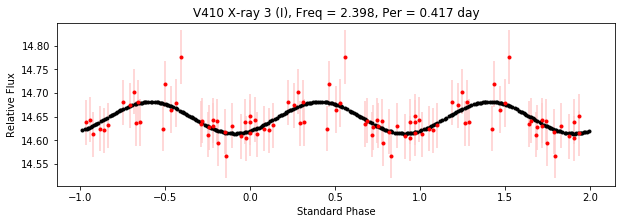

V410 X-ray 3 the period of 0.746995745834


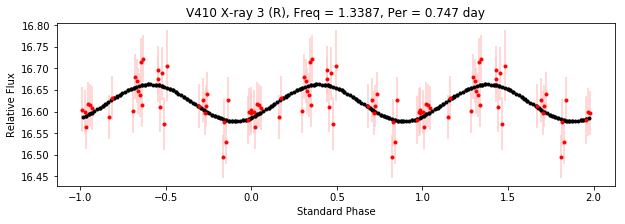

V410 X-ray 3 the period of 0.970660850337


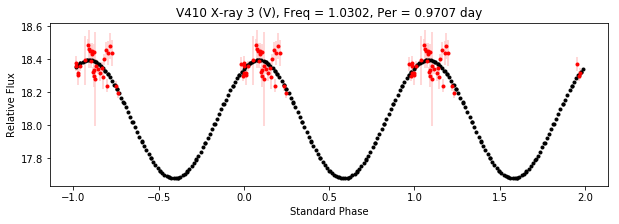

V410 X-ray 3 the period of 3.53299670179


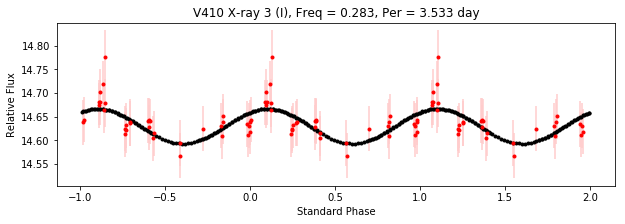

V410 X-ray 3 the period of 2.86555664536


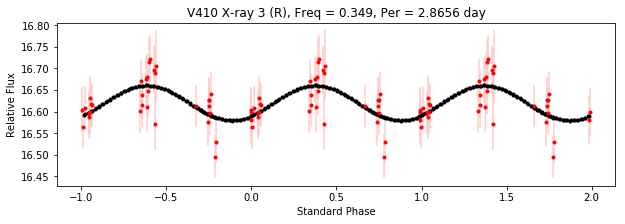

In [37]:
filters = ['V','I','R']
min_freq = 0.25
max_freq = 4
        
per_targ = ['FR Tau','FQ Tau A+B','V410 X-ray 6','V410 X-ray 3'] 

for ind in range(0,len(per_targ)): 
    best_per = np.zeros([3,5]) #generating empty best period array
    #making that best period array (contains each band)
    for filt in range(0,len(filters)): #looping through each filter
        time_n = all_targ_data[per_targ[ind],filters[filt]][1] #time for each target
        starflux_n = all_targ_data[per_targ[ind],filters[filt]][0] #star flux with nans
        starfluxerr_n = all_targ_data_err[per_targ[ind],filters[filt]] #error with nans
        starflux = starflux_n[~np.isnan(starflux_n)] #starflux without nans
        starfluxerr = starfluxerr_n[~np.isnan(starfluxerr_n)] #starflux error without nans
        time = time_n[~np.isnan(starflux_n)] #time without nans
     
        f, p = LombScargle(time, starflux, starfluxerr).autopower(minimum_frequency = min_freq, maximum_frequency = max_freq) # default autopower settings
        
        # calculate the period, as inverse of frequency
        per = 1/f
        
        # make an array of the three columns and turn that into a dataframe:
        ls_output_arrays = np.c_[p, f, per]
        ls_output = pd.DataFrame(ls_output_arrays, columns=['Power', 'Frequency', 'Period'])
        
        # now sort the whole dataframe by the “Power” column and save the first 10 rows:
        best_per_df = ls_output.sort_values(by='Power', ascending=False)['Period']
        best_per[filt] = best_per_df[:5].values #saving the 10 strongest periods in this band
    #testing the best period
    for per in range(0,len(best_per[0])-1):
        for filt in range(0,len(filters)):
            test_per = best_per[filt][per] #looping through the V band periods
            print(per_targ[ind]+' the period of '+str(test_per)) #print common V band period
            #then model that period on all three bands
            time_n = all_targ_data[per_targ[ind],filters[filt]][1] #time for each target
            starflux_n = all_targ_data[per_targ[ind],filters[filt]][0] #star flux with nans
            starfluxerr_n = all_targ_data_err[per_targ[ind],filters[filt]] #error with nans
            starflux = starflux_n[~np.isnan(starflux_n)] #starflux without nans
            starfluxerr = starfluxerr_n[~np.isnan(starfluxerr_n)] #starflux error without nans
            time = time_n[~np.isnan(starflux_n)] #time without nans
                
            time_ep = time[2] #time epoch to test phase against CHANGE
            phase_data = ((time-time_ep)/test_per) #phase
            stnd_phase_data = phase_data%1 #normalized phase
                
            test_freq = 1/test_per
                
            time_model = np.linspace(np.min(time), np.max(time), 100) #a model of the time
            mag_model = LombScargle(time, starflux, starfluxerr).model(time_model, test_freq) #model of the best period
            phase_LS = ((time_model-time_ep)/test_per) #phase from the model
            stnd_phase_LS = phase_LS%1 #normalized phase from the model
            
            #making a new plot for periodigram
            fig, ax = plt.subplots(figsize=(10,3)) #setting up a new plot
            plt.plot(stnd_phase_LS, mag_model, 'k.') #plot the model normal phase
            plt.plot(stnd_phase_LS+-np.max(stnd_phase_LS), mag_model, 'k.') #as well as model +phase
            plt.plot(stnd_phase_LS+np.max(stnd_phase_LS), mag_model, 'k.') #and model -phase
                
            plt.errorbar(stnd_phase_data + -np.max(stnd_phase_data), starflux, starfluxerr, fmt='.', color='red', ecolor='#ffcccc') #-phase data
            plt.errorbar(stnd_phase_data + 0, starflux, starfluxerr, fmt='.', color='red', ecolor='#ffcccc') #normal phase data
            plt.errorbar(stnd_phase_data + np.max(stnd_phase_data), starflux, starfluxerr, fmt='.', color='red', ecolor='#ffcccc') #+phase data
                  
            plt.xlabel('Standard Phase')
            plt.ylabel('Relative Flux')
            plt.title(per_targ[ind]+' ('+filters[filt]+')'+', '+'Freq = '+str(round(test_freq,4))+', Per = '+str(round(test_per,4))+' day')
            plt.show()

In [65]:
time[]

2     58133.14025
3     58133.14767
4     58133.16503
5     58133.17960
6     58133.20594
7     58133.28366
8     58133.29440
9     58132.21172
10    58134.15113
11    58134.13297
12    58134.16309
13    58134.17296
14    58134.24051
15    58134.25066
16    58135.29596
17    58135.27667
18    58136.16582
19    58136.14430
20    58136.17657
21    58136.18721
22    58137.14392
23    58137.12832
24    58137.15443
25    58137.16532
26    58137.23039
27    58137.24668
28    58137.25747
29    58137.26911
30    58138.17195
31    58138.15613
32    58138.18260
33    58138.19326
34    58138.26179
35    58138.27402
Name: J.D.-240000, dtype: float64

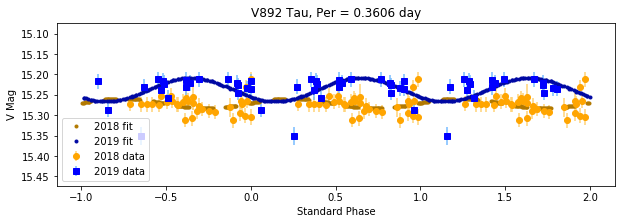

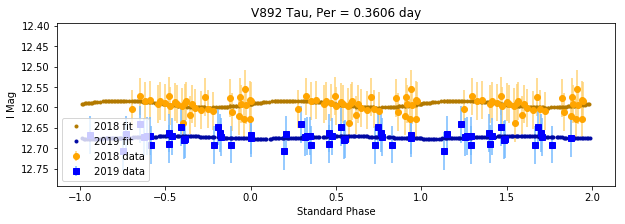

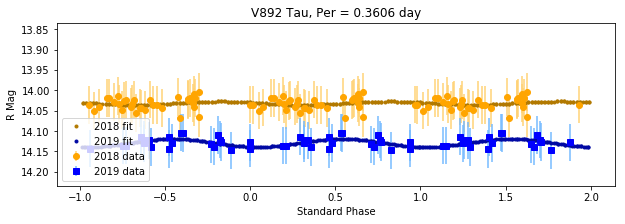

In [338]:
ind = 0
per_targ = 'V892 Tau'
test_per = 0.3606
for filt in range(0,len(filters)):

#     time_n = all_targ_data[per_targ[ind],filters[filt]][1] #time for each target
#     starflux_n = all_targ_data[per_targ[ind],filters[filt]][0] #star flux with nans
#     starfluxerr_n = all_targ_data_err[per_targ[ind],filters[filt]] #error with nans
#     starflux = starflux_n[~np.isnan(starflux_n)] #starflux without nans
#     starfluxerr = starfluxerr_n[~np.isnan(starfluxerr_n)] #starflux error without nans
#     time = time_n[~np.isnan(starflux_n)] #time without nans
    test_freq = 1/test_per
    
    time_n_19 = genfromtxt(direct+'/'+per_targ+'/'+per_targ+'_2019_'+filters[filt]+'t.csv', delimiter=',') #time for each target
    starflux_n_19 = genfromtxt(direct+'/'+per_targ+'/'+per_targ+'_2019_'+filters[filt]+'.csv', delimiter=',') #star flux with nans
    starfluxerr_n_19 = genfromtxt(direct+'/'+per_targ+'/'+per_targ+'_2019_'+filters[filt]+'e.csv', delimiter=',') #error with nans
    starflux_19 = starflux_n_19[~np.isnan(starflux_n_19)] #starflux without nans
    starfluxerr_19 = starfluxerr_n_19[~np.isnan(starfluxerr_n_19)] #starflux error without nans
    time_19 = time_n_19[~np.isnan(starflux_n_19)] #time without nans
    
    time_ep = time_19[1] #time epoch to test phase against CHANGE
    
    
    phase_data_19 = ((time_19-time_ep)/test_per) #phase
    stnd_phase_data_19 = phase_data_19%1 #normalized phase
    
    time_model_19 = np.linspace(np.min(time_19), np.max(time_19), 100) #a model of the time
    mag_model_19 = LombScargle(time_19, starflux_19, starfluxerr_19).model(time_model_19, test_freq) #model of the best period
    phase_LS_19 = ((time_model_19-time_ep)/test_per) #phase from the model
    stnd_phase_LS_19 = phase_LS_19%1 #normalized phase from the model
    
    time_ep = time_18[2]+0.5
    
    time_n_18 = genfromtxt(direct+'/'+per_targ+'/'+per_targ+'_2018_'+filters[filt]+'t.csv', delimiter=',') #time for each target
    starflux_n_18 = genfromtxt(direct+'/'+per_targ+'/'+per_targ+'_2018_'+filters[filt]+'.csv', delimiter=',') #star flux with nans
    starfluxerr_n_18 = genfromtxt(direct+'/'+per_targ+'/'+per_targ+'_2018_'+filters[filt]+'e.csv', delimiter=',') #error with nans
    starflux_18 = starflux_n_18[~np.isnan(starflux_n_18)] #starflux without nans
    starfluxerr_18 = starfluxerr_n_18[~np.isnan(starfluxerr_n_18)] #starflux error without nans
    time_18 = time_n_18[~np.isnan(starflux_n_18)] #time without nans
    
    phase_data_18 = ((time_18-time_ep)/test_per) #phase
    stnd_phase_data_18 = phase_data_18%1 #normalized phase

    
    time_model_18 = np.linspace(np.min(time_18), np.max(time_18), 100) #a model of the time
    mag_model_18 = LombScargle(time_18, starflux_18, starfluxerr_18).model(time_model_18, test_freq) #model of the best period
    phase_LS_18 = ((time_model_18-time_ep)/test_per) #phase from the model
    stnd_phase_LS_18 = phase_LS_18%1 #normalized phase from the model
    
    #making a new plot for periodigram
    fig, ax = plt.subplots(figsize=(10,3)) #setting up a new plot
    
    plt.plot(stnd_phase_LS_18, mag_model_18,'.',color = '#b27900',label='2018 fit') #plot the model normal phase
    plt.plot(stnd_phase_LS_18+-np.max(stnd_phase_LS_18), mag_model_18, '.',color = '#b27900') #as well as model +phase
    plt.plot(stnd_phase_LS_18+np.max(stnd_phase_LS_18), mag_model_18, '.',color = '#b27900') #and model -phase

    plt.errorbar(stnd_phase_data_18 + -np.max(stnd_phase_data_18), starflux_18, starfluxerr_18, fmt='o', color='orange', ecolor='#ffd275',label='2018 data') #-phase data
    plt.errorbar(stnd_phase_data_18 + 0, starflux_18, starfluxerr_18, fmt='o', color='orange', ecolor='#ffd275') #normal phase data
    plt.errorbar(stnd_phase_data_18 + np.max(stnd_phase_data_18), starflux_18, starfluxerr_18, fmt='o', color='orange', ecolor='#ffd275') #+phase data

    
    plt.plot(stnd_phase_LS_19, mag_model_19, '.',color = '#0008a3') #plot the model normal phase
    plt.plot(stnd_phase_LS_19+-np.max(stnd_phase_LS_19), mag_model_19, '.',color = '#0008a3',label='2019 fit') #as well as model +phase
    plt.plot(stnd_phase_LS_19+np.max(stnd_phase_LS_19), mag_model_19, '.',color = '#0008a3') #and model -phase

    plt.errorbar(stnd_phase_data_19 + -np.max(stnd_phase_data_19), starflux_19, starfluxerr_19, fmt='s', color='blue', ecolor='#75baff',label='2019 data') #-phase data
    plt.errorbar(stnd_phase_data_19 + 0, starflux_19, starfluxerr_19, fmt='s', color='blue', ecolor='#75baff') #normal phase data
    plt.errorbar(stnd_phase_data_19 + np.max(stnd_phase_data_19), starflux_19, starfluxerr_19, fmt='s', color='blue', ecolor='#75baff') #+phase data

    plt.xlabel('Standard Phase')
    plt.ylabel(filters[filt]+' Mag')
    plt.title(per_targ+', Per = '+str(round(test_per,4))+' day')
    plt.ylim([np.median(starflux_18)+0.2,np.median(starflux_18)-0.2])
    plt.legend(loc=3)
    plt.show()

In [ ]:
# time_ep = time_19[5]+0.5
time_ep

table should have targ name, is it variable, periodic?, amplitude, period
normalize bands for color based on median flux
vinyetting

In [3]:
from HDI_io import construct_astrometry

In [4]:
direct = os.getcwd()
image = glob.glob(direct+'/Data/'+'Coord_Fu*.fit*')

hdulist = fits.open(image[0])

hdr_wcs = hdulist[0].header

world = construct_astrometry(hdr_wcs)

IndexError: list index out of range

In [5]:
im_dat = fits.getdata(image[0])
bkg_sigma = 5
nsigma = 5

daofind = DAOStarFinder(fwhm=4., threshold=nsigma*bkg_sigma)

sources = daofind(im_dat)
aprad = 8

xpos = np.array(sources['xcentroid'])
ypos = np.array(sources['ycentroid'])

taura,taudec = world.all_pix2world(xpos,ypos,0)
survey_csv = glob.glob(direct+'/Survey*.csv')
survey = pd.read_csv(survey_csv[0])


IndexError: list index out of range

In [6]:
file = open('matched_sources.reg','w')
ind = 0
for star in range(0,len(survey)):
    s_ra = survey['RAJ2000'][star] #ra for survey star
    s_de = survey['DEJ2000'][star] #dec for survey star
    try:
        ra_ind = np.where(np.abs(taura-s_ra)<(15e-4))[0][0] #finding the index of the ra of the star in our survey (if it's within 5arcsec)
        de_ind = np.where(np.abs(taudec-s_de)<(15e-4))[0][0] #finding the index of the dec of the star in our survey (if it's within 5arcsec)
        if ra_ind == de_ind: #if the indexes match (the coordinates are for the same star)
            file.write('circle '+str(xpos[ra_ind])+' '+str(ypos[de_ind])+' '+str(int(aprad))+' # width=3 color=red\n')
    except:
        pass
    
file.close()

NameError: name 'survey' is not defined

In [4]:
target = 'DD Tau A+B'
dd_dat_data = np.loadtxt('ddtaumod.dat',dtype=str)
herbst_time = []
herbst_V =[]
herbst_R = []
for rr in range(0,len(dd_dat_data)):
    herbst_time.append(float(dd_dat_data[rr][0])+2.44e6)
    herbst_V.append(float(dd_dat_data[rr][1]))
    herbst_R.append(herbst_V[rr]-float(dd_dat_data[rr][4]))
    if dd_dat_data[rr][4]=='99.99':
        herbst_R[rr] = np.nan

In [5]:
russ_R = pd.read_csv(direct+'/'+target+'/'+'Historic Data - DD_R.csv')
mine_R19 = genfromtxt(direct+'/'+target+'/'+target+'_2019_R.csv', delimiter=',')
mine_t19 = genfromtxt(direct+'/'+target+'/'+target+'_2019_Rt.csv', delimiter=',')+2.4e6
mine_R18 = genfromtxt(direct+'/'+target+'/'+target+'_2018_R.csv', delimiter=',')
mine_t18 = genfromtxt(direct+'/'+target+'/'+target+'_2018_Rt.csv', delimiter=',')+2.4e6

Text(0.5,1,'DD Tau Thru the Ages')

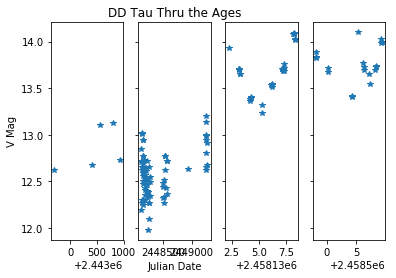

In [6]:
f,(ax,ax2,ax3,ax4) = plt.subplots(1,4,sharey=True, facecolor='w')
ax.plot(russ_R['Julian'],russ_R['RMag'],'*')
ax2.plot(herbst_time,herbst_R,'*')
ax3.plot(mine_t18,mine_R18,'*')
ax4.plot(mine_t19,mine_R19,'*')
ax.set_ylabel('V Mag')
ax2.set_xlabel('Julian Date')
ax2.set_title('DD Tau Thru the Ages')

In [7]:
herbst_time = np.array(herbst_time)
herbst_R = np.array(herbst_R)

In [8]:

year_ind = {}
tt = 0
init = 0
days = 20
last =0
while last<len(herbst_time)-1:
    if tt == 0:
        init = init+days
        print(init)
        diff = (np.array(herbst_time)-(herbst_time[0]))
        year_ind[tt] = np.where((diff<init)&(diff>=(init-days)))[0]
        #year_ind[tt] = np.where(herbst_time[pos_ind]<(herbst_time[0]+init))[0]
        last = year_ind[tt][len(year_ind[tt])-1]
        tt = tt+1
    elif tt>100:
        break
    else:
        try:
            #year_ind[tt] = np.where(((np.array(herbst_time)-herbst_time[last+1]))<(days) & ((np.array(herbst_time)-herbst_time[prev_last])>(0)))[0]
            init = init+days
            print(init)
            diff = (np.array(herbst_time)-(herbst_time[0]))
            year_ind[tt] = np.where((diff<init)&(diff>=(init-days)))[0]
            #year_ind[tt] = np.where((herbst_time[pos_ind]<=(herbst_time[0]+init)) & (herbst_time[pos_ind]>(herbst_time[pos_ind][len(pos_ind)-1]-days)))[0]
            last = year_ind[tt][len(year_ind[tt])-1]
            tt = tt+1
        except IndexError:
            pass
            

20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980
1000
1020
1040
1060
1080
1100
1120
1140
1160


In [9]:
year_ind_R = {}
tt = 0
init = 0
days = 20
last =0
while last<len(russ_R)-1:
    if tt == 0:
        init = init+days
        print(init)
        diff = (np.array(russ_R['Julian'])-(russ_R['Julian'][0]))
        year_ind_R[tt] = np.where((diff<init)&(diff>=(init-days)))[0]
        #year_ind[tt] = np.where(herbst_time[pos_ind]<(herbst_time[0]+init))[0]
        last = year_ind_R[tt][len(year_ind_R[tt])-1]
        tt = tt+1
    elif tt>=100:
        break
    else:
        try:
            #year_ind[tt] = np.where(((np.array(herbst_time)-herbst_time[last+1]))<(days) & ((np.array(herbst_time)-herbst_time[prev_last])>(0)))[0]
            init = init+days
            print(init)
            diff = (np.array(russ_R['Julian'])-(russ_R['Julian'][0]))
            year_ind_R[tt] = np.where((diff<init)&(diff>=(init-days)))[0]
            #year_ind[tt] = np.where((herbst_time[pos_ind]<=(herbst_time[0]+init)) & (herbst_time[pos_ind]>(herbst_time[pos_ind][len(pos_ind)-1]-days)))[0]
            last = year_ind_R[tt][len(year_ind_R[tt])-1]
            tt = tt+1
        except IndexError:
            pass
            

20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720


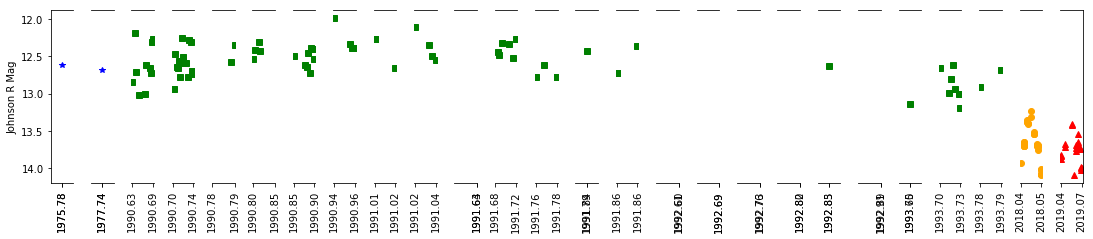

In [15]:
add = len(year_ind_R)+2
fig, ax = plt.subplots(1,len(year_ind)+add,figsize=(15,3),sharey = True)
ax[0].invert_yaxis()
plt.tight_layout()
from matplotlib.ticker import FormatStrFormatter
for oo in range(0,len(year_ind)+add):
    if oo==len(year_ind)+len(year_ind_R):
        ax[oo].plot(t_mine18.byear,mine_R18,'o',color='orange')
        ax[oo].set_xticks([t_mine18.byear[0],t_mine18.byear[-1]])
    elif oo==len(year_ind)+1+len(year_ind_R):
        ax[oo].plot(t_mine19.byear,mine_R19,'^',color='red')
        ax[oo].set_xticks([np.min(t_mine19.byear),np.max(t_mine19.byear)])
    elif oo<len(year_ind_R):
        ax[oo].plot(t_russ.byear[year_ind_R[oo]],russ_R['RMag'][year_ind_R[oo]],'*',color='blue')
        ax[oo].set_xticks([t_russ.byear[year_ind_R[oo]][0],t_russ.byear[year_ind_R[oo]][-1]])
    else:
        ax[oo].plot(t_herbst.byear[year_ind[int(oo-len(year_ind_R))]],herbst_R[year_ind[int(oo-len(year_ind_R))]],'s',color='green')
        ax[oo].set_xticks([t_herbst.byear[year_ind[int(oo-len(year_ind_R))]][0],t_herbst.byear[year_ind[int(oo-len(year_ind_R))]][-1]])
    
    if oo>0 and oo<(len(year_ind)+add-1):
        ax[oo].spines['right'].set_visible(False)
        ax[oo].spines['left'].set_visible(False)
        ax[oo].yaxis.set_ticks_position('none') 
    elif oo==0:
        ax[oo].spines['right'].set_visible(False)
        ax[oo].set_ylabel('Johnson R Mag')
    elif oo==(len(year_ind)+add-1):
        ax[oo].spines['left'].set_visible(False)
        ax[oo].yaxis.set_ticks_position('none') 
    
    ax[oo].tick_params(axis='x', rotation=90)
    ax[oo].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

In [31]:
from astropy.time import Time

In [13]:
t_russ = Time(russ_R['Julian'], format='jd')
t_herbst = Time(herbst_time, format='jd')
t_mine18 = Time(mine_t18, format='jd')
t_mine19 = Time(mine_t19, format='jd')

In [11]:
herbst_V = np.array(herbst_V)